In [25]:
import matplotlib.pyplot as plt
import torch
import seaborn as sns
import networkx as nx
import pandas 
import json, os
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set()

In [2]:
def parse_graph(inpath, outpath, save = True):
    df = pandas.DataFrame(columns=['id1', 'id2'])
    with open(inpath, 'r') as f:
        line = f.readline()
        cnt = 1
        while line:
            df.loc[cnt] = line.strip().split("\t")
            line = f.readline()
            cnt += 1
    df['weight'] = 1
    if save:
        df.to_csv(os.path.join(outpath, 'data.csv'), index=False)
        train, test = train_test_split(df, train_size = 0.8)
        train.to_csv(os.path.join(outpath, 'train.csv'), index=False)
        test.to_csv(os.path.join(outpath, 'test.csv'), index=False)
    return df
    

In [7]:
df = parse_graph('resources/physics/CA-GrQc.txt', 
                 'resources/physics/')

In [9]:
len(df['id1'].unique())

5242

In [18]:
outpath = 'resources/physics/'
train, test = train_test_split(df, train_size = 0.8)
train.to_csv(os.path.join(outpath, 'train5.csv'), index=False)
test.to_csv(os.path.join(outpath, 'test5.csv'), index=False)

In [ ]:
python3 embed.py \
       -dim 2 \
       -lr 0.3 \
       -epochs 100 \
       -negs 10 \
       -burnin 20 \
       -ndproc 4 \
       -manifold poincare \
       -dset resources/physics/train.csv \
       -checkpoint results/physics/result.pth \
       -batchsize 10 \
       -eval_each 1 \
       -sparse \
       -train_threads 2
       -sym

python3 embed.py \
       -dim 2 \
       -lr 0.3 \
       -epochs 200 \
       -negs 50 \
       -burnin 20 \
       -ndproc 4 \
       -manifold euclidean \
       -dset resources/physics/train.csv \
       -checkpoint results/physics/result_eu.pth \
       -batchsize 10 \
       -eval_each 1 \
       -sparse \
       -train_threads 2
       -sym

In [ ]:
python3 link_pred.py \
       -dim 10 \
       -lr 0.3 \
       -epochs 100 \
       -negs 10 \
       -burnin 20 \
       -ndproc 4 \
       -manifold poincare \
       -dset resources/physics/data.csv \
       -batchsize 10 \
       -eval_each 20 \
       -sparse \
       -train_threads 2 \
       -sym

python3 link_pred.py \
       -dim 10 \
       -lr 0.3 \
       -epochs 100 \
       -negs 50 \
       -burnin 20 \
       -ndproc 4 \
       -manifold euclidean \
       -dset resources/physics/data.csv \
       -batchsize 10 \
       -eval_each 20 \
       -sparse \
       -train_threads 2 \
       -sym

In [114]:
from hype.euclidean import EuclideanManifold
from hype.poincare import PoincareManifold
from sklearn.metrics import average_precision_score

def link_prob(d, r, t):
    return 1/(np.exp((d-r)/t)+1) #eq. 7 in paper
              
def link_pred_map(obj, embedding, distfn, r=1, t=1, n=None):
    ap_list = []
    objs = list(zip(range(len(obj)), obj)) #for tqdm to work
    if n:
        idx = np.random.choice(range(len(obj)), size=n)
        objs = [(i,x) for i,x in objs if i in idx]
    for i, node in tqdm(objs):
        dists = distfn(embedding[None, i], embedding).numpy()
        dists[i] = 1e2
        probs = [link_prob(d, r, t) for d in dists]
        y_true = get_y_true(obj, node, df)
        ap = average_precision_score(y_true, probs)
        ap_list.append(ap) #calculates average percision score
    return np.mean(ap_list)
                
def get_y_true(obj, v, df): 
    y_pred = []
    v_edge_to = df[df['id1'] == v]['id2'].to_numpy()
    y_true = [1 if n in v_edge_to else 0 for n in obj]
    return y_true
    

In [83]:
937 in obj

True

In [89]:
937 in df[df['id1'] == 3466]['id2']

True

In [70]:
link_prob(4, 0.5, 1)

0.02931223075135632

In [17]:
chkpnt = torch.load('results/physics_first/result.pth.199', map_location='cpu')

embedding = chkpnt['embeddings']
obj = chkpnt['objects']

df = pandas.read_csv('resources/physics/data.csv')

In [26]:
from hype.poincare import PoincareManifold


In [101]:
map_1 = link_pred_map(obj, embedding, PoincareManifold().distance, 0.5, 1)










  0%|          | 0/5214 [00:00<?, ?it/s]








  0%|          | 4/5214 [00:00<02:46, 31.29it/s]








  0%|          | 8/5214 [00:00<02:47, 31.03it/s]








  0%|          | 12/5214 [00:00<02:45, 31.45it/s]








  0%|          | 16/5214 [00:00<02:44, 31.62it/s]








  0%|          | 20/5214 [00:00<02:43, 31.75it/s]








  0%|          | 24/5214 [00:00<02:42, 31.86it/s]








  1%|          | 28/5214 [00:00<02:44, 31.58it/s]








  1%|          | 31/5214 [00:00<02:47, 30.92it/s]








  1%|          | 34/5214 [00:01<02:54, 29.67it/s]








  1%|          | 37/5214 [00:01<02:54, 29.68it/s]








  1%|          | 41/5214 [00:01<02:53, 29.85it/s]








  1%|          | 44/5214 [00:01<02:53, 29.88it/s]








  1%|          | 48/5214 [00:01<02:52, 29.99it/s]








  1%|          | 52/5214 [00:01<02:51, 30.17it/s]








  1%|          | 56/5214 [00:01<02:50, 30.33it/s]








  1%|          | 60/5214 [00:01<02:48, 30.52it/s]








  1%|          |

  6%|▋         | 335/5214 [00:11<02:52, 28.31it/s]








  6%|▋         | 338/5214 [00:11<02:51, 28.48it/s]








  7%|▋         | 341/5214 [00:11<02:54, 27.97it/s]








  7%|▋         | 344/5214 [00:11<02:56, 27.53it/s]








  7%|▋         | 347/5214 [00:11<02:55, 27.66it/s]








  7%|▋         | 350/5214 [00:11<02:57, 27.40it/s]








  7%|▋         | 353/5214 [00:11<02:56, 27.50it/s]








  7%|▋         | 356/5214 [00:12<02:54, 27.76it/s]








  7%|▋         | 359/5214 [00:12<02:54, 27.83it/s]








  7%|▋         | 362/5214 [00:12<02:55, 27.67it/s]








  7%|▋         | 365/5214 [00:12<02:54, 27.76it/s]








  7%|▋         | 368/5214 [00:12<02:53, 28.01it/s]








  7%|▋         | 371/5214 [00:12<02:52, 28.00it/s]








  7%|▋         | 374/5214 [00:12<02:52, 28.07it/s]








  7%|▋         | 377/5214 [00:12<02:54, 27.74it/s]








  7%|▋         | 380/5214 [00:12<02:52, 27.95it/s]








  7%|▋         | 383/5214 [00:13<02:51, 28.11it/s]







 12%|█▏        | 620/5214 [00:21<02:46, 27.65it/s]








 12%|█▏        | 623/5214 [00:21<02:46, 27.49it/s]








 12%|█▏        | 626/5214 [00:21<02:47, 27.36it/s]








 12%|█▏        | 629/5214 [00:21<02:48, 27.25it/s]








 12%|█▏        | 632/5214 [00:21<02:45, 27.66it/s]








 12%|█▏        | 635/5214 [00:22<02:46, 27.53it/s]








 12%|█▏        | 638/5214 [00:22<02:45, 27.63it/s]








 12%|█▏        | 641/5214 [00:22<02:45, 27.68it/s]








 12%|█▏        | 644/5214 [00:22<02:45, 27.64it/s]








 12%|█▏        | 647/5214 [00:22<02:45, 27.57it/s]








 12%|█▏        | 650/5214 [00:22<02:44, 27.73it/s]








 13%|█▎        | 653/5214 [00:22<02:46, 27.34it/s]








 13%|█▎        | 656/5214 [00:22<02:49, 26.83it/s]








 13%|█▎        | 659/5214 [00:22<02:48, 27.05it/s]








 13%|█▎        | 662/5214 [00:23<02:47, 27.26it/s]








 13%|█▎        | 665/5214 [00:23<02:46, 27.38it/s]








 13%|█▎        | 668/5214 [00:23<02:45, 27.53it/s]







 17%|█▋        | 906/5214 [00:32<02:59, 24.01it/s]








 17%|█▋        | 909/5214 [00:32<02:49, 25.38it/s]








 17%|█▋        | 912/5214 [00:32<02:43, 26.33it/s]








 18%|█▊        | 915/5214 [00:33<03:35, 19.92it/s]








 18%|█▊        | 918/5214 [00:33<03:16, 21.87it/s]








 18%|█▊        | 922/5214 [00:33<03:25, 20.85it/s]








 18%|█▊        | 925/5214 [00:33<03:24, 20.96it/s]








 18%|█▊        | 928/5214 [00:33<03:07, 22.91it/s]








 18%|█▊        | 931/5214 [00:33<02:58, 23.94it/s]








 18%|█▊        | 934/5214 [00:33<02:52, 24.78it/s]








 18%|█▊        | 937/5214 [00:34<02:46, 25.70it/s]








 18%|█▊        | 940/5214 [00:34<02:44, 25.98it/s]








 18%|█▊        | 943/5214 [00:34<02:44, 26.00it/s]








 18%|█▊        | 946/5214 [00:34<02:43, 26.16it/s]








 18%|█▊        | 949/5214 [00:34<02:39, 26.68it/s]








 18%|█▊        | 952/5214 [00:34<02:35, 27.43it/s]








 18%|█▊        | 955/5214 [00:34<02:37, 27.04it/s]







 23%|██▎       | 1189/5214 [00:43<02:30, 26.74it/s]








 23%|██▎       | 1192/5214 [00:44<02:27, 27.31it/s]








 23%|██▎       | 1195/5214 [00:44<02:29, 26.91it/s]








 23%|██▎       | 1198/5214 [00:44<02:25, 27.51it/s]








 23%|██▎       | 1201/5214 [00:44<02:26, 27.42it/s]








 23%|██▎       | 1204/5214 [00:44<02:32, 26.35it/s]








 23%|██▎       | 1207/5214 [00:44<02:28, 27.05it/s]








 23%|██▎       | 1210/5214 [00:44<02:25, 27.50it/s]








 23%|██▎       | 1213/5214 [00:44<02:27, 27.16it/s]








 23%|██▎       | 1216/5214 [00:44<02:24, 27.72it/s]








 23%|██▎       | 1219/5214 [00:45<02:31, 26.45it/s]








 23%|██▎       | 1222/5214 [00:45<02:36, 25.57it/s]








 23%|██▎       | 1225/5214 [00:45<02:38, 25.18it/s]








 24%|██▎       | 1228/5214 [00:45<02:36, 25.55it/s]








 24%|██▎       | 1231/5214 [00:45<02:31, 26.25it/s]








 24%|██▎       | 1234/5214 [00:45<02:26, 27.18it/s]








 24%|██▎       | 1238/5214 [00:45<02:21,

 29%|██▉       | 1506/5214 [00:55<02:03, 30.08it/s]








 29%|██▉       | 1510/5214 [00:55<02:00, 30.63it/s]








 29%|██▉       | 1514/5214 [00:55<01:59, 30.86it/s]








 29%|██▉       | 1518/5214 [00:55<01:59, 30.99it/s]








 29%|██▉       | 1522/5214 [00:55<02:02, 30.03it/s]








 29%|██▉       | 1526/5214 [00:55<02:00, 30.51it/s]








 29%|██▉       | 1530/5214 [00:56<01:59, 30.87it/s]








 29%|██▉       | 1534/5214 [00:56<01:58, 31.14it/s]








 29%|██▉       | 1538/5214 [00:56<02:00, 30.54it/s]








 30%|██▉       | 1542/5214 [00:56<01:57, 31.19it/s]








 30%|██▉       | 1546/5214 [00:56<01:57, 31.24it/s]








 30%|██▉       | 1550/5214 [00:56<01:56, 31.55it/s]








 30%|██▉       | 1554/5214 [00:56<01:55, 31.59it/s]








 30%|██▉       | 1558/5214 [00:56<01:55, 31.67it/s]








 30%|██▉       | 1562/5214 [00:57<01:55, 31.61it/s]








 30%|███       | 1566/5214 [00:57<01:55, 31.64it/s]








 30%|███       | 1570/5214 [00:57<01:55,

 36%|███▌      | 1880/5214 [01:07<01:45, 31.48it/s]








 36%|███▌      | 1884/5214 [01:07<01:44, 31.95it/s]








 36%|███▌      | 1888/5214 [01:07<01:43, 32.02it/s]








 36%|███▋      | 1892/5214 [01:07<01:44, 31.73it/s]








 36%|███▋      | 1896/5214 [01:07<01:45, 31.35it/s]








 36%|███▋      | 1900/5214 [01:08<01:46, 31.01it/s]








 37%|███▋      | 1904/5214 [01:08<01:44, 31.68it/s]








 37%|███▋      | 1908/5214 [01:08<01:46, 30.93it/s]








 37%|███▋      | 1912/5214 [01:08<01:44, 31.66it/s]








 37%|███▋      | 1916/5214 [01:08<01:44, 31.44it/s]








 37%|███▋      | 1920/5214 [01:08<01:43, 31.70it/s]








 37%|███▋      | 1924/5214 [01:08<01:42, 31.98it/s]








 37%|███▋      | 1928/5214 [01:08<01:43, 31.89it/s]








 37%|███▋      | 1932/5214 [01:09<01:42, 32.14it/s]








 37%|███▋      | 1936/5214 [01:09<01:42, 32.07it/s]








 37%|███▋      | 1940/5214 [01:09<01:42, 31.96it/s]








 37%|███▋      | 1944/5214 [01:09<01:41,

 43%|████▎     | 2255/5214 [01:19<01:58, 25.07it/s]








 43%|████▎     | 2259/5214 [01:19<01:48, 27.12it/s]








 43%|████▎     | 2263/5214 [01:19<01:42, 28.66it/s]








 43%|████▎     | 2267/5214 [01:19<01:39, 29.68it/s]








 44%|████▎     | 2271/5214 [01:19<01:36, 30.58it/s]








 44%|████▎     | 2275/5214 [01:19<01:33, 31.59it/s]








 44%|████▎     | 2279/5214 [01:19<01:31, 32.07it/s]








 44%|████▍     | 2283/5214 [01:20<01:32, 31.76it/s]








 44%|████▍     | 2287/5214 [01:20<01:30, 32.49it/s]








 44%|████▍     | 2291/5214 [01:20<01:28, 32.97it/s]








 44%|████▍     | 2295/5214 [01:20<01:27, 33.26it/s]








 44%|████▍     | 2299/5214 [01:20<01:27, 33.37it/s]








 44%|████▍     | 2303/5214 [01:20<01:26, 33.51it/s]








 44%|████▍     | 2307/5214 [01:20<01:26, 33.67it/s]








 44%|████▍     | 2311/5214 [01:20<01:26, 33.41it/s]








 44%|████▍     | 2315/5214 [01:21<01:28, 32.72it/s]








 44%|████▍     | 2319/5214 [01:21<01:29,

 50%|█████     | 2619/5214 [01:31<01:33, 27.90it/s]








 50%|█████     | 2623/5214 [01:31<01:29, 29.02it/s]








 50%|█████     | 2627/5214 [01:31<01:26, 29.85it/s]








 50%|█████     | 2631/5214 [01:31<01:29, 28.93it/s]








 51%|█████     | 2634/5214 [01:31<01:33, 27.59it/s]








 51%|█████     | 2637/5214 [01:31<01:32, 28.00it/s]








 51%|█████     | 2641/5214 [01:31<01:27, 29.28it/s]








 51%|█████     | 2645/5214 [01:31<01:26, 29.69it/s]








 51%|█████     | 2648/5214 [01:32<01:26, 29.76it/s]








 51%|█████     | 2652/5214 [01:32<01:24, 30.44it/s]








 51%|█████     | 2656/5214 [01:32<01:23, 30.49it/s]








 51%|█████     | 2660/5214 [01:32<01:23, 30.69it/s]








 51%|█████     | 2664/5214 [01:32<01:21, 31.31it/s]








 51%|█████     | 2668/5214 [01:32<01:21, 31.39it/s]








 51%|█████     | 2672/5214 [01:32<01:20, 31.63it/s]








 51%|█████▏    | 2676/5214 [01:32<01:19, 31.81it/s]








 51%|█████▏    | 2680/5214 [01:33<01:19,

 57%|█████▋    | 2986/5214 [01:43<01:11, 31.33it/s]








 57%|█████▋    | 2990/5214 [01:43<01:11, 31.23it/s]








 57%|█████▋    | 2994/5214 [01:43<01:10, 31.47it/s]








 57%|█████▋    | 2998/5214 [01:43<01:12, 30.70it/s]








 58%|█████▊    | 3002/5214 [01:43<01:13, 29.99it/s]








 58%|█████▊    | 3006/5214 [01:43<01:13, 29.87it/s]








 58%|█████▊    | 3009/5214 [01:43<01:13, 29.91it/s]








 58%|█████▊    | 3013/5214 [01:43<01:11, 30.59it/s]








 58%|█████▊    | 3017/5214 [01:44<01:11, 30.92it/s]








 58%|█████▊    | 3021/5214 [01:44<01:10, 30.90it/s]








 58%|█████▊    | 3025/5214 [01:44<01:11, 30.63it/s]








 58%|█████▊    | 3029/5214 [01:44<01:10, 30.81it/s]








 58%|█████▊    | 3033/5214 [01:44<01:09, 31.17it/s]








 58%|█████▊    | 3037/5214 [01:44<01:09, 31.33it/s]








 58%|█████▊    | 3041/5214 [01:44<01:08, 31.68it/s]








 58%|█████▊    | 3045/5214 [01:44<01:08, 31.65it/s]








 58%|█████▊    | 3049/5214 [01:45<01:09,

 64%|██████▍   | 3355/5214 [01:55<01:02, 29.83it/s]








 64%|██████▍   | 3359/5214 [01:55<01:01, 30.16it/s]








 64%|██████▍   | 3363/5214 [01:55<01:01, 29.99it/s]








 65%|██████▍   | 3367/5214 [01:55<01:01, 29.90it/s]








 65%|██████▍   | 3371/5214 [01:55<01:00, 30.39it/s]








 65%|██████▍   | 3375/5214 [01:55<00:59, 30.90it/s]








 65%|██████▍   | 3379/5214 [01:56<01:00, 30.56it/s]








 65%|██████▍   | 3383/5214 [01:56<01:00, 30.51it/s]








 65%|██████▍   | 3387/5214 [01:56<01:00, 30.35it/s]








 65%|██████▌   | 3391/5214 [01:56<00:59, 30.63it/s]








 65%|██████▌   | 3395/5214 [01:56<00:59, 30.71it/s]








 65%|██████▌   | 3399/5214 [01:56<00:59, 30.40it/s]








 65%|██████▌   | 3403/5214 [01:56<00:59, 30.63it/s]








 65%|██████▌   | 3407/5214 [01:56<00:58, 30.68it/s]








 65%|██████▌   | 3411/5214 [01:57<00:57, 31.23it/s]








 65%|██████▌   | 3415/5214 [01:57<00:56, 31.71it/s]








 66%|██████▌   | 3419/5214 [01:57<00:56,

 71%|███████▏  | 3724/5214 [02:07<00:47, 31.45it/s]








 71%|███████▏  | 3728/5214 [02:07<00:47, 31.26it/s]








 72%|███████▏  | 3732/5214 [02:07<00:47, 31.12it/s]








 72%|███████▏  | 3736/5214 [02:07<00:46, 31.62it/s]








 72%|███████▏  | 3740/5214 [02:08<00:46, 31.80it/s]








 72%|███████▏  | 3744/5214 [02:08<00:46, 31.42it/s]








 72%|███████▏  | 3748/5214 [02:08<00:47, 31.14it/s]








 72%|███████▏  | 3752/5214 [02:08<00:47, 30.75it/s]








 72%|███████▏  | 3756/5214 [02:08<00:46, 31.12it/s]








 72%|███████▏  | 3760/5214 [02:08<00:46, 31.41it/s]








 72%|███████▏  | 3764/5214 [02:08<00:45, 31.69it/s]








 72%|███████▏  | 3768/5214 [02:08<00:45, 31.79it/s]








 72%|███████▏  | 3772/5214 [02:09<00:45, 31.77it/s]








 72%|███████▏  | 3776/5214 [02:09<00:45, 31.83it/s]








 72%|███████▏  | 3780/5214 [02:09<00:45, 31.77it/s]








 73%|███████▎  | 3784/5214 [02:09<00:44, 31.78it/s]








 73%|███████▎  | 3788/5214 [02:09<00:45,

 79%|███████▊  | 4099/5214 [02:19<00:36, 30.93it/s]








 79%|███████▊  | 4103/5214 [02:19<00:37, 29.86it/s]








 79%|███████▊  | 4106/5214 [02:19<00:37, 29.82it/s]








 79%|███████▉  | 4109/5214 [02:19<00:37, 29.72it/s]








 79%|███████▉  | 4112/5214 [02:19<00:37, 29.62it/s]








 79%|███████▉  | 4116/5214 [02:19<00:36, 30.16it/s]








 79%|███████▉  | 4120/5214 [02:20<00:35, 30.47it/s]








 79%|███████▉  | 4124/5214 [02:20<00:35, 30.93it/s]








 79%|███████▉  | 4128/5214 [02:20<00:34, 31.17it/s]








 79%|███████▉  | 4132/5214 [02:20<00:34, 31.64it/s]








 79%|███████▉  | 4136/5214 [02:20<00:34, 31.43it/s]








 79%|███████▉  | 4140/5214 [02:20<00:33, 31.70it/s]








 79%|███████▉  | 4144/5214 [02:20<00:33, 31.73it/s]








 80%|███████▉  | 4148/5214 [02:21<00:34, 30.60it/s]








 80%|███████▉  | 4152/5214 [02:21<00:33, 31.27it/s]








 80%|███████▉  | 4156/5214 [02:21<00:33, 31.56it/s]








 80%|███████▉  | 4160/5214 [02:21<00:33,

 86%|████████▌ | 4472/5214 [02:31<00:23, 31.93it/s]








 86%|████████▌ | 4476/5214 [02:31<00:22, 32.25it/s]








 86%|████████▌ | 4480/5214 [02:31<00:22, 32.45it/s]








 86%|████████▌ | 4484/5214 [02:31<00:22, 32.35it/s]








 86%|████████▌ | 4488/5214 [02:31<00:22, 32.64it/s]








 86%|████████▌ | 4492/5214 [02:31<00:22, 32.52it/s]








 86%|████████▌ | 4496/5214 [02:31<00:22, 32.56it/s]








 86%|████████▋ | 4500/5214 [02:32<00:21, 32.64it/s]








 86%|████████▋ | 4504/5214 [02:32<00:21, 32.57it/s]








 86%|████████▋ | 4508/5214 [02:32<00:21, 32.42it/s]








 87%|████████▋ | 4512/5214 [02:32<00:21, 32.59it/s]








 87%|████████▋ | 4516/5214 [02:32<00:21, 32.72it/s]








 87%|████████▋ | 4520/5214 [02:32<00:21, 32.90it/s]








 87%|████████▋ | 4524/5214 [02:32<00:20, 32.92it/s]








 87%|████████▋ | 4528/5214 [02:32<00:20, 32.79it/s]








 87%|████████▋ | 4532/5214 [02:33<00:20, 32.55it/s]








 87%|████████▋ | 4536/5214 [02:33<00:20,

 93%|█████████▎| 4848/5214 [02:43<00:11, 31.59it/s]








 93%|█████████▎| 4852/5214 [02:43<00:11, 31.12it/s]








 93%|█████████▎| 4856/5214 [02:43<00:11, 30.77it/s]








 93%|█████████▎| 4860/5214 [02:43<00:11, 30.77it/s]








 93%|█████████▎| 4864/5214 [02:43<00:11, 30.44it/s]








 93%|█████████▎| 4868/5214 [02:43<00:11, 29.99it/s]








 93%|█████████▎| 4872/5214 [02:43<00:11, 29.57it/s]








 94%|█████████▎| 4876/5214 [02:44<00:11, 30.04it/s]








 94%|█████████▎| 4880/5214 [02:44<00:10, 30.72it/s]








 94%|█████████▎| 4884/5214 [02:44<00:10, 30.83it/s]








 94%|█████████▎| 4888/5214 [02:44<00:10, 30.80it/s]








 94%|█████████▍| 4892/5214 [02:44<00:10, 30.76it/s]








 94%|█████████▍| 4896/5214 [02:44<00:13, 23.76it/s]








 94%|█████████▍| 4899/5214 [02:44<00:12, 25.07it/s]








 94%|█████████▍| 4903/5214 [02:45<00:11, 26.68it/s]








 94%|█████████▍| 4906/5214 [02:45<00:11, 27.50it/s]








 94%|█████████▍| 4909/5214 [02:45<00:11,

 99%|█████████▉| 5171/5214 [02:54<00:01, 30.66it/s]








 99%|█████████▉| 5175/5214 [02:54<00:01, 30.76it/s]








 99%|█████████▉| 5179/5214 [02:54<00:01, 30.36it/s]








 99%|█████████▉| 5183/5214 [02:54<00:01, 30.31it/s]








 99%|█████████▉| 5187/5214 [02:54<00:00, 30.29it/s]








100%|█████████▉| 5191/5214 [02:54<00:00, 30.37it/s]








100%|█████████▉| 5195/5214 [02:55<00:00, 30.52it/s]








100%|█████████▉| 5199/5214 [02:55<00:00, 30.58it/s]








100%|█████████▉| 5203/5214 [02:55<00:00, 31.05it/s]








100%|█████████▉| 5207/5214 [02:55<00:00, 30.87it/s]








100%|█████████▉| 5211/5214 [02:55<00:00, 30.63it/s]








100%|██████████| 5214/5214 [02:55<00:00, 29.67it/s]

In [104]:
map_1

0.4973006863824331

In [115]:
map_051 = link_pred_map(obj, embedding, PoincareManifold().distance, 0.5, 1, 100)
map_0509 = link_pred_map(obj, embedding, PoincareManifold().distance, 0.5, 0.9, 100)
map_041 = link_pred_map(obj, embedding, PoincareManifold().distance, 0.4, 1, 100)
map_0409 = link_pred_map(obj, embedding, PoincareManifold().distance, 0.4, 0.9, 100)










  0%|          | 0/98 [00:00<?, ?it/s]








  4%|▍         | 4/98 [00:00<00:02, 31.89it/s]








  8%|▊         | 8/98 [00:00<00:02, 31.76it/s]








 12%|█▏        | 12/98 [00:00<00:02, 31.71it/s]








 16%|█▋        | 16/98 [00:00<00:02, 31.74it/s]








 20%|██        | 20/98 [00:00<00:02, 31.89it/s]








 24%|██▍       | 24/98 [00:00<00:02, 31.94it/s]








 29%|██▊       | 28/98 [00:00<00:02, 32.02it/s]








 33%|███▎      | 32/98 [00:01<00:02, 31.84it/s]








 37%|███▋      | 36/98 [00:01<00:02, 30.86it/s]








 40%|███▉      | 39/98 [00:01<00:02, 29.22it/s]








 44%|████▍     | 43/98 [00:01<00:01, 29.61it/s]








 48%|████▊     | 47/98 [00:01<00:01, 29.86it/s]








 52%|█████▏    | 51/98 [00:01<00:01, 30.35it/s]








 56%|█████▌    | 55/98 [00:01<00:01, 30.97it/s]








 60%|██████    | 59/98 [00:01<00:01, 31.31it/s]








 64%|██████▍   | 63/98 [00:02<00:01, 31.78it/s]








 68%|██████▊   | 67/98 [00:02<00:00, 32.08it/s]




 75%|███████▌  | 75/100 [00:02<00:00, 31.60it/s]








 79%|███████▉  | 79/100 [00:02<00:00, 31.69it/s]








 83%|████████▎ | 83/100 [00:02<00:00, 31.75it/s]








 87%|████████▋ | 87/100 [00:02<00:00, 31.94it/s]








 91%|█████████ | 91/100 [00:02<00:00, 32.21it/s]








 95%|█████████▌| 95/100 [00:02<00:00, 31.39it/s]








 99%|█████████▉| 99/100 [00:03<00:00, 31.17it/s]








100%|██████████| 100/100 [00:03<00:00, 31.62it/s]

In [117]:
print(map_051,map_0509, map_041, map_0409)

0.48988828795684547 0.49403091466578025 0.5130560715373118 0.540250068944691


In [125]:
x = [0.1, 0.2, 0.3, 0.4, 0.5]
y = [0.6, 0.7, 0.8, 0.9]

In [126]:
l = []
for r, t in np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))]):
    l.append((r, t))
    mapx = link_pred_map(obj, embedding, PoincareManifold().distance, r, t, 500)
    l.append(mapx)











  0%|          | 0/476 [00:00<?, ?it/s]









  1%|          | 4/476 [00:00<00:14, 33.09it/s]









  2%|▏         | 8/476 [00:00<00:14, 32.88it/s]









  3%|▎         | 12/476 [00:00<00:14, 32.93it/s]









  3%|▎         | 16/476 [00:00<00:13, 33.05it/s]









  4%|▍         | 20/476 [00:00<00:13, 32.69it/s]









  5%|▌         | 24/476 [00:00<00:13, 32.67it/s]









  6%|▌         | 28/476 [00:00<00:13, 32.65it/s]









  7%|▋         | 32/476 [00:00<00:13, 31.97it/s]









  8%|▊         | 36/476 [00:01<00:14, 30.47it/s]









  8%|▊         | 40/476 [00:01<00:14, 30.70it/s]









  9%|▉         | 44/476 [00:01<00:13, 30.88it/s]









 10%|█         | 48/476 [00:01<00:13, 31.18it/s]









 11%|█         | 52/476 [00:01<00:13, 31.38it/s]









 12%|█▏        | 56/476 [00:01<00:13, 31.67it/s]









 13%|█▎        | 60/476 [00:01<00:13, 31.72it/s]









 13%|█▎        | 64/476 [00:02<00:12, 32.17it/s]









 14%|█▍        

 76%|███████▋  | 363/476 [00:11<00:03, 31.48it/s]









 77%|███████▋  | 367/476 [00:11<00:03, 31.61it/s]









 78%|███████▊  | 371/476 [00:11<00:03, 31.89it/s]









 79%|███████▉  | 375/476 [00:11<00:03, 31.76it/s]









 80%|███████▉  | 379/476 [00:12<00:03, 32.21it/s]









 80%|████████  | 383/476 [00:12<00:02, 32.27it/s]









 81%|████████▏ | 387/476 [00:12<00:02, 31.64it/s]









 82%|████████▏ | 391/476 [00:12<00:02, 31.50it/s]









 83%|████████▎ | 395/476 [00:12<00:02, 31.63it/s]









 84%|████████▍ | 399/476 [00:12<00:02, 31.69it/s]









 85%|████████▍ | 403/476 [00:12<00:02, 31.52it/s]









 86%|████████▌ | 407/476 [00:12<00:02, 31.49it/s]









 86%|████████▋ | 411/476 [00:13<00:02, 31.27it/s]









 87%|████████▋ | 415/476 [00:13<00:01, 30.75it/s]









 88%|████████▊ | 419/476 [00:13<00:01, 30.78it/s]









 89%|████████▉ | 423/476 [00:13<00:01, 31.03it/s]









 90%|████████▉ | 427/476 [00:13<00:01, 30.90it/s]








 50%|█████     | 241/478 [00:07<00:07, 29.80it/s]









 51%|█████▏    | 245/478 [00:07<00:07, 30.63it/s]









 52%|█████▏    | 249/478 [00:07<00:07, 31.34it/s]









 53%|█████▎    | 253/478 [00:08<00:07, 31.95it/s]









 54%|█████▍    | 257/478 [00:08<00:06, 32.49it/s]









 55%|█████▍    | 261/478 [00:08<00:06, 32.98it/s]









 55%|█████▌    | 265/478 [00:08<00:06, 33.31it/s]









 56%|█████▋    | 269/478 [00:08<00:06, 33.46it/s]









 57%|█████▋    | 273/478 [00:08<00:06, 33.45it/s]









 58%|█████▊    | 277/478 [00:08<00:06, 33.50it/s]









 59%|█████▉    | 281/478 [00:08<00:05, 33.70it/s]









 60%|█████▉    | 285/478 [00:08<00:05, 33.01it/s]









 60%|██████    | 289/478 [00:09<00:05, 33.33it/s]









 61%|██████▏   | 293/478 [00:09<00:05, 33.08it/s]









 62%|██████▏   | 297/478 [00:09<00:05, 33.51it/s]









 63%|██████▎   | 301/478 [00:09<00:05, 33.14it/s]









 64%|██████▍   | 305/478 [00:09<00:05, 33.60it/s]








 22%|██▏       | 103/478 [00:03<00:11, 31.94it/s]









 22%|██▏       | 107/478 [00:04<00:11, 31.91it/s]









 23%|██▎       | 111/478 [00:04<00:11, 32.18it/s]









 24%|██▍       | 115/478 [00:04<00:11, 32.70it/s]









 25%|██▍       | 119/478 [00:04<00:10, 33.03it/s]









 26%|██▌       | 123/478 [00:04<00:10, 32.62it/s]









 27%|██▋       | 127/478 [00:04<00:10, 32.71it/s]









 27%|██▋       | 131/478 [00:04<00:10, 32.61it/s]









 28%|██▊       | 135/478 [00:04<00:10, 32.40it/s]









 29%|██▉       | 139/478 [00:05<00:10, 31.78it/s]









 30%|██▉       | 143/478 [00:05<00:10, 31.79it/s]









 31%|███       | 147/478 [00:05<00:10, 32.44it/s]









 32%|███▏      | 151/478 [00:05<00:09, 32.78it/s]









 32%|███▏      | 155/478 [00:05<00:09, 32.42it/s]









 33%|███▎      | 159/478 [00:05<00:09, 32.77it/s]









 34%|███▍      | 163/478 [00:05<00:09, 33.08it/s]









 35%|███▍      | 167/478 [00:05<00:09, 33.00it/s]








 92%|█████████▏| 438/478 [00:15<00:01, 32.34it/s]









 92%|█████████▏| 442/478 [00:15<00:01, 31.69it/s]









 93%|█████████▎| 446/478 [00:15<00:01, 31.64it/s]









 94%|█████████▍| 450/478 [00:15<00:00, 31.09it/s]









 95%|█████████▍| 454/478 [00:15<00:00, 31.74it/s]









 96%|█████████▌| 458/478 [00:16<00:00, 32.19it/s]









 97%|█████████▋| 462/478 [00:16<00:00, 23.23it/s]









 97%|█████████▋| 465/478 [00:16<00:00, 23.35it/s]









 98%|█████████▊| 469/478 [00:16<00:00, 25.39it/s]









 99%|█████████▉| 473/478 [00:16<00:00, 26.86it/s]









100%|█████████▉| 477/478 [00:16<00:00, 27.84it/s]









100%|██████████| 478/478 [00:16<00:00, 28.22it/s]









  0%|          | 0/477 [00:00<?, ?it/s]









  1%|          | 4/477 [00:00<00:15, 31.13it/s]









  1%|▏         | 7/477 [00:00<00:15, 30.21it/s]









  2%|▏         | 9/477 [00:00<00:19, 24.15it/s]









  2%|▏         | 11/477 [00:00<00:20, 22.65it/s]









  3%|▎        

 55%|█████▍    | 262/477 [00:09<00:07, 29.03it/s]









 56%|█████▌    | 265/477 [00:09<00:07, 28.84it/s]









 56%|█████▋    | 269/477 [00:10<00:06, 30.09it/s]









 57%|█████▋    | 273/477 [00:10<00:06, 30.67it/s]









 58%|█████▊    | 277/477 [00:10<00:06, 31.47it/s]









 59%|█████▉    | 281/477 [00:10<00:06, 32.02it/s]









 60%|█████▉    | 285/477 [00:10<00:06, 31.59it/s]









 61%|██████    | 289/477 [00:10<00:05, 31.92it/s]









 61%|██████▏   | 293/477 [00:10<00:05, 32.09it/s]









 62%|██████▏   | 297/477 [00:10<00:05, 32.34it/s]









 63%|██████▎   | 301/477 [00:11<00:05, 32.28it/s]









 64%|██████▍   | 305/477 [00:11<00:05, 31.85it/s]









 65%|██████▍   | 309/477 [00:11<00:05, 32.02it/s]









 66%|██████▌   | 313/477 [00:11<00:05, 31.80it/s]









 66%|██████▋   | 317/477 [00:11<00:05, 31.19it/s]









 67%|██████▋   | 321/477 [00:11<00:04, 31.65it/s]









 68%|██████▊   | 325/477 [00:11<00:04, 32.02it/s]








 31%|███       | 148/477 [00:04<00:09, 33.96it/s]









 32%|███▏      | 152/477 [00:04<00:09, 33.76it/s]









 33%|███▎      | 156/477 [00:04<00:09, 33.60it/s]









 34%|███▎      | 160/477 [00:04<00:09, 33.64it/s]









 34%|███▍      | 164/477 [00:04<00:09, 33.77it/s]









 35%|███▌      | 168/477 [00:05<00:09, 33.96it/s]









 36%|███▌      | 172/477 [00:05<00:08, 34.01it/s]









 37%|███▋      | 176/477 [00:05<00:08, 34.11it/s]









 38%|███▊      | 180/477 [00:05<00:08, 34.11it/s]









 39%|███▊      | 184/477 [00:05<00:08, 34.04it/s]









 39%|███▉      | 188/477 [00:05<00:08, 34.38it/s]









 40%|████      | 192/477 [00:05<00:08, 34.63it/s]









 41%|████      | 196/477 [00:05<00:08, 34.79it/s]









 42%|████▏     | 200/477 [00:05<00:08, 34.17it/s]









 43%|████▎     | 204/477 [00:06<00:07, 34.59it/s]









 44%|████▎     | 208/477 [00:06<00:07, 34.83it/s]









 44%|████▍     | 212/477 [00:06<00:07, 34.29it/s]








  7%|▋         | 32/474 [00:00<00:12, 34.63it/s]









  8%|▊         | 36/474 [00:01<00:12, 34.76it/s]









  8%|▊         | 40/474 [00:01<00:12, 34.83it/s]









  9%|▉         | 44/474 [00:01<00:12, 34.93it/s]









 10%|█         | 48/474 [00:01<00:12, 34.95it/s]









 11%|█         | 52/474 [00:01<00:12, 35.05it/s]









 12%|█▏        | 56/474 [00:01<00:11, 35.01it/s]









 13%|█▎        | 60/474 [00:01<00:11, 35.04it/s]









 14%|█▎        | 64/474 [00:01<00:11, 35.18it/s]









 14%|█▍        | 68/474 [00:01<00:11, 35.29it/s]









 15%|█▌        | 72/474 [00:02<00:11, 35.21it/s]









 16%|█▌        | 76/474 [00:02<00:11, 35.24it/s]









 17%|█▋        | 80/474 [00:02<00:11, 35.19it/s]









 18%|█▊        | 84/474 [00:02<00:11, 35.15it/s]









 19%|█▊        | 88/474 [00:02<00:10, 35.30it/s]









 19%|█▉        | 92/474 [00:02<00:10, 35.39it/s]









 20%|██        | 96/474 [00:02<00:10, 35.50it/s]









 21%|██       

 84%|████████▍ | 400/474 [00:11<00:02, 33.84it/s]









 85%|████████▌ | 404/474 [00:11<00:02, 33.65it/s]









 86%|████████▌ | 408/474 [00:11<00:01, 33.32it/s]









 87%|████████▋ | 412/474 [00:11<00:01, 33.85it/s]









 88%|████████▊ | 416/474 [00:12<00:01, 33.96it/s]









 89%|████████▊ | 420/474 [00:12<00:01, 34.32it/s]









 89%|████████▉ | 424/474 [00:12<00:01, 34.44it/s]









 90%|█████████ | 428/474 [00:12<00:01, 34.08it/s]









 91%|█████████ | 432/474 [00:12<00:01, 33.94it/s]









 92%|█████████▏| 436/474 [00:12<00:01, 34.18it/s]









 93%|█████████▎| 440/474 [00:12<00:00, 34.63it/s]









 94%|█████████▎| 444/474 [00:12<00:00, 34.93it/s]









 95%|█████████▍| 448/474 [00:12<00:00, 34.46it/s]









 95%|█████████▌| 452/474 [00:13<00:00, 34.93it/s]









 96%|█████████▌| 456/474 [00:13<00:00, 35.10it/s]









 97%|█████████▋| 460/474 [00:13<00:00, 35.10it/s]









 98%|█████████▊| 464/474 [00:13<00:00, 35.00it/s]








 60%|█████▉    | 285/478 [00:08<00:05, 32.92it/s]









 60%|██████    | 289/478 [00:09<00:05, 33.23it/s]









 61%|██████▏   | 293/478 [00:09<00:05, 32.70it/s]









 62%|██████▏   | 297/478 [00:09<00:05, 32.63it/s]









 63%|██████▎   | 301/478 [00:09<00:05, 32.81it/s]









 64%|██████▍   | 305/478 [00:09<00:05, 32.99it/s]









 65%|██████▍   | 309/478 [00:09<00:05, 32.80it/s]









 65%|██████▌   | 313/478 [00:09<00:05, 32.67it/s]









 66%|██████▋   | 317/478 [00:09<00:04, 32.70it/s]









 67%|██████▋   | 321/478 [00:10<00:04, 32.84it/s]









 68%|██████▊   | 325/478 [00:10<00:04, 33.02it/s]









 69%|██████▉   | 329/478 [00:10<00:04, 33.38it/s]









 70%|██████▉   | 333/478 [00:10<00:04, 33.02it/s]









 71%|███████   | 337/478 [00:10<00:04, 32.64it/s]









 71%|███████▏  | 341/478 [00:10<00:04, 32.75it/s]









 72%|███████▏  | 345/478 [00:10<00:03, 33.37it/s]









 73%|███████▎  | 349/478 [00:10<00:03, 33.80it/s]








 36%|███▌      | 168/472 [00:05<00:09, 33.15it/s]









 36%|███▋      | 172/472 [00:05<00:08, 33.67it/s]









 37%|███▋      | 176/472 [00:05<00:08, 33.84it/s]









 38%|███▊      | 180/472 [00:05<00:08, 33.35it/s]









 39%|███▉      | 184/472 [00:05<00:08, 33.39it/s]









 40%|███▉      | 188/472 [00:05<00:08, 33.23it/s]









 41%|████      | 192/472 [00:05<00:08, 33.74it/s]









 42%|████▏     | 196/472 [00:05<00:08, 34.12it/s]









 42%|████▏     | 200/472 [00:06<00:08, 33.27it/s]









 43%|████▎     | 204/472 [00:06<00:08, 32.67it/s]









 44%|████▍     | 208/472 [00:06<00:08, 32.95it/s]









 45%|████▍     | 212/472 [00:06<00:07, 33.14it/s]









 46%|████▌     | 216/472 [00:06<00:07, 32.09it/s]









 47%|████▋     | 220/472 [00:06<00:07, 32.75it/s]









 47%|████▋     | 224/472 [00:06<00:07, 32.81it/s]









 48%|████▊     | 228/472 [00:06<00:07, 32.49it/s]









 49%|████▉     | 232/472 [00:07<00:07, 33.22it/s]








 13%|█▎        | 60/478 [00:01<00:12, 33.25it/s]









 13%|█▎        | 64/478 [00:01<00:12, 33.25it/s]









 14%|█▍        | 68/478 [00:02<00:12, 32.36it/s]









 15%|█▌        | 72/478 [00:02<00:12, 31.57it/s]









 16%|█▌        | 76/478 [00:02<00:12, 30.96it/s]









 17%|█▋        | 80/478 [00:02<00:12, 31.37it/s]









 18%|█▊        | 84/478 [00:02<00:12, 32.34it/s]









 18%|█▊        | 88/478 [00:02<00:12, 32.47it/s]









 19%|█▉        | 92/478 [00:02<00:11, 32.24it/s]









 20%|██        | 96/478 [00:02<00:11, 32.28it/s]









 21%|██        | 100/478 [00:03<00:11, 32.35it/s]









 22%|██▏       | 104/478 [00:03<00:11, 32.24it/s]









 23%|██▎       | 108/478 [00:03<00:11, 32.55it/s]









 23%|██▎       | 112/478 [00:03<00:11, 33.11it/s]









 24%|██▍       | 116/478 [00:03<00:10, 33.09it/s]









 25%|██▌       | 120/478 [00:03<00:10, 33.01it/s]









 26%|██▌       | 124/478 [00:03<00:10, 33.08it/s]









 27%|██

 90%|████████▉ | 428/478 [00:13<00:01, 34.17it/s]









 90%|█████████ | 432/478 [00:13<00:01, 34.38it/s]









 91%|█████████ | 436/478 [00:13<00:01, 34.45it/s]









 92%|█████████▏| 440/478 [00:13<00:01, 34.10it/s]









 93%|█████████▎| 444/478 [00:13<00:01, 33.69it/s]









 94%|█████████▎| 448/478 [00:13<00:00, 34.06it/s]









 95%|█████████▍| 452/478 [00:13<00:00, 34.45it/s]









 95%|█████████▌| 456/478 [00:13<00:00, 34.71it/s]









 96%|█████████▌| 460/478 [00:13<00:00, 34.76it/s]









 97%|█████████▋| 464/478 [00:14<00:00, 34.99it/s]









 98%|█████████▊| 468/478 [00:14<00:00, 34.78it/s]









 99%|█████████▊| 472/478 [00:14<00:00, 34.93it/s]









100%|█████████▉| 476/478 [00:14<00:00, 34.81it/s]









100%|██████████| 478/478 [00:14<00:00, 32.93it/s]









  0%|          | 0/476 [00:00<?, ?it/s]









  1%|          | 4/476 [00:00<00:13, 35.05it/s]









  2%|▏         | 8/476 [00:00<00:13, 35.13it/s]









  3%|▎     

 66%|██████▌   | 312/476 [00:09<00:04, 34.45it/s]









 66%|██████▋   | 316/476 [00:09<00:04, 34.01it/s]









 67%|██████▋   | 320/476 [00:09<00:04, 33.96it/s]









 68%|██████▊   | 324/476 [00:09<00:04, 34.21it/s]









 69%|██████▉   | 328/476 [00:09<00:04, 34.37it/s]









 70%|██████▉   | 332/476 [00:09<00:04, 34.74it/s]









 71%|███████   | 336/476 [00:09<00:03, 35.02it/s]









 71%|███████▏  | 340/476 [00:09<00:03, 34.52it/s]









 72%|███████▏  | 344/476 [00:09<00:03, 34.80it/s]









 73%|███████▎  | 348/476 [00:10<00:03, 35.00it/s]









 74%|███████▍  | 352/476 [00:10<00:03, 35.00it/s]









 75%|███████▍  | 356/476 [00:10<00:03, 34.45it/s]









 76%|███████▌  | 360/476 [00:10<00:03, 33.91it/s]









 76%|███████▋  | 364/476 [00:10<00:03, 33.71it/s]









 77%|███████▋  | 368/476 [00:10<00:03, 33.81it/s]









 78%|███████▊  | 372/476 [00:10<00:03, 33.92it/s]









 79%|███████▉  | 376/476 [00:10<00:02, 34.33it/s]








 42%|████▏     | 200/480 [00:05<00:08, 33.42it/s]









 42%|████▎     | 204/480 [00:05<00:08, 33.82it/s]









 43%|████▎     | 208/480 [00:06<00:07, 34.06it/s]









 44%|████▍     | 212/480 [00:06<00:07, 33.61it/s]









 45%|████▌     | 216/480 [00:06<00:07, 33.44it/s]









 46%|████▌     | 220/480 [00:06<00:07, 33.83it/s]









 47%|████▋     | 224/480 [00:06<00:07, 34.20it/s]









 48%|████▊     | 228/480 [00:06<00:07, 33.86it/s]









 48%|████▊     | 232/480 [00:06<00:07, 33.39it/s]









 49%|████▉     | 236/480 [00:06<00:07, 33.74it/s]









 50%|█████     | 240/480 [00:07<00:07, 34.06it/s]









 51%|█████     | 244/480 [00:07<00:06, 34.33it/s]









 52%|█████▏    | 248/480 [00:07<00:06, 34.62it/s]









 52%|█████▎    | 252/480 [00:07<00:06, 34.42it/s]









 53%|█████▎    | 256/480 [00:07<00:06, 34.04it/s]









 54%|█████▍    | 260/480 [00:07<00:06, 34.31it/s]









 55%|█████▌    | 264/480 [00:07<00:06, 34.55it/s]








 18%|█▊        | 84/473 [00:02<00:11, 34.11it/s]









 19%|█▊        | 88/473 [00:02<00:11, 33.98it/s]









 19%|█▉        | 92/473 [00:02<00:11, 33.89it/s]









 20%|██        | 96/473 [00:02<00:11, 34.13it/s]









 21%|██        | 100/473 [00:02<00:10, 33.99it/s]









 22%|██▏       | 104/473 [00:03<00:10, 34.28it/s]









 23%|██▎       | 108/473 [00:03<00:10, 34.23it/s]









 24%|██▎       | 112/473 [00:03<00:10, 34.51it/s]









 25%|██▍       | 116/473 [00:03<00:10, 34.51it/s]









 25%|██▌       | 120/473 [00:03<00:10, 34.66it/s]









 26%|██▌       | 124/473 [00:03<00:10, 34.66it/s]









 27%|██▋       | 128/473 [00:03<00:09, 34.61it/s]









 28%|██▊       | 132/473 [00:03<00:09, 34.41it/s]









 29%|██▉       | 136/473 [00:03<00:09, 34.57it/s]









 30%|██▉       | 140/473 [00:04<00:09, 34.50it/s]









 30%|███       | 144/473 [00:04<00:09, 34.57it/s]









 31%|███▏      | 148/473 [00:04<00:09, 34.07it/s]









 

 96%|█████████▌| 452/473 [00:13<00:00, 35.10it/s]









 96%|█████████▋| 456/473 [00:13<00:00, 35.28it/s]









 97%|█████████▋| 460/473 [00:13<00:00, 35.25it/s]









 98%|█████████▊| 464/473 [00:13<00:00, 34.90it/s]









 99%|█████████▉| 468/473 [00:13<00:00, 35.00it/s]









100%|█████████▉| 472/473 [00:13<00:00, 35.30it/s]









100%|██████████| 473/473 [00:13<00:00, 34.77it/s]









  0%|          | 0/472 [00:00<?, ?it/s]









  1%|          | 4/472 [00:00<00:13, 34.01it/s]









  2%|▏         | 8/472 [00:00<00:13, 34.23it/s]









  3%|▎         | 12/472 [00:00<00:13, 34.50it/s]









  3%|▎         | 16/472 [00:00<00:13, 34.79it/s]









  4%|▍         | 20/472 [00:00<00:12, 35.04it/s]









  5%|▌         | 24/472 [00:00<00:12, 35.21it/s]









  6%|▌         | 28/472 [00:00<00:12, 35.12it/s]









  7%|▋         | 32/472 [00:00<00:12, 34.93it/s]









  8%|▊         | 36/472 [00:01<00:12, 35.11it/s]









  8%|▊         | 4

 72%|███████▏  | 340/472 [00:09<00:03, 34.58it/s]









 73%|███████▎  | 344/472 [00:09<00:03, 34.45it/s]









 74%|███████▎  | 348/472 [00:10<00:03, 34.61it/s]









 75%|███████▍  | 352/472 [00:10<00:03, 34.83it/s]









 75%|███████▌  | 356/472 [00:10<00:03, 34.67it/s]









 76%|███████▋  | 360/472 [00:10<00:03, 34.75it/s]









 77%|███████▋  | 364/472 [00:10<00:03, 34.33it/s]









 78%|███████▊  | 368/472 [00:10<00:02, 34.69it/s]









 79%|███████▉  | 372/472 [00:10<00:02, 34.44it/s]









 80%|███████▉  | 376/472 [00:10<00:02, 34.78it/s]









 81%|████████  | 380/472 [00:11<00:02, 34.65it/s]









 81%|████████▏ | 384/472 [00:11<00:02, 34.73it/s]









 82%|████████▏ | 388/472 [00:11<00:02, 34.76it/s]









 83%|████████▎ | 392/472 [00:11<00:02, 34.94it/s]









 84%|████████▍ | 396/472 [00:11<00:02, 34.75it/s]









 85%|████████▍ | 400/472 [00:11<00:02, 34.44it/s]









 86%|████████▌ | 404/472 [00:11<00:01, 34.42it/s]








 48%|████▊     | 232/479 [00:06<00:07, 34.32it/s]









 49%|████▉     | 236/479 [00:06<00:07, 34.44it/s]









 50%|█████     | 240/479 [00:06<00:06, 34.31it/s]









 51%|█████     | 244/479 [00:07<00:06, 34.47it/s]









 52%|█████▏    | 248/479 [00:07<00:06, 34.43it/s]









 53%|█████▎    | 252/479 [00:07<00:06, 34.39it/s]









 53%|█████▎    | 256/479 [00:07<00:06, 34.53it/s]









 54%|█████▍    | 260/479 [00:07<00:06, 34.50it/s]









 55%|█████▌    | 264/479 [00:07<00:06, 34.59it/s]









 56%|█████▌    | 268/479 [00:07<00:06, 34.53it/s]









 57%|█████▋    | 272/479 [00:07<00:06, 34.47it/s]









 58%|█████▊    | 276/479 [00:07<00:05, 34.48it/s]









 58%|█████▊    | 280/479 [00:08<00:05, 34.52it/s]









 59%|█████▉    | 284/479 [00:08<00:05, 34.82it/s]









 60%|██████    | 288/479 [00:08<00:05, 35.00it/s]









 61%|██████    | 292/479 [00:08<00:05, 35.19it/s]









 62%|██████▏   | 296/479 [00:08<00:05, 35.40it/s]








 24%|██▍       | 116/483 [00:03<00:10, 35.21it/s]









 25%|██▍       | 120/483 [00:03<00:10, 35.35it/s]









 26%|██▌       | 124/483 [00:03<00:10, 35.36it/s]









 27%|██▋       | 128/483 [00:03<00:10, 35.45it/s]









 27%|██▋       | 132/483 [00:03<00:09, 35.45it/s]









 28%|██▊       | 136/483 [00:03<00:09, 35.27it/s]









 29%|██▉       | 140/483 [00:03<00:09, 34.93it/s]









 30%|██▉       | 144/483 [00:04<00:09, 35.02it/s]









 31%|███       | 148/483 [00:04<00:09, 35.09it/s]









 31%|███▏      | 152/483 [00:04<00:09, 35.21it/s]









 32%|███▏      | 156/483 [00:04<00:09, 35.27it/s]









 33%|███▎      | 160/483 [00:04<00:09, 35.25it/s]









 34%|███▍      | 164/483 [00:04<00:09, 35.41it/s]









 35%|███▍      | 168/483 [00:04<00:08, 35.53it/s]









 36%|███▌      | 172/483 [00:04<00:08, 35.27it/s]









 36%|███▋      | 176/483 [00:04<00:08, 35.31it/s]









 37%|███▋      | 180/483 [00:05<00:08, 35.35it/s]








100%|██████████| 483/483 [00:13<00:00, 35.33it/s]









  0%|          | 0/473 [00:00<?, ?it/s]









  1%|          | 4/473 [00:00<00:13, 36.06it/s]









  2%|▏         | 8/473 [00:00<00:12, 35.97it/s]









  3%|▎         | 12/473 [00:00<00:12, 35.55it/s]









  3%|▎         | 16/473 [00:00<00:12, 35.54it/s]









  4%|▍         | 20/473 [00:00<00:12, 35.58it/s]









  5%|▌         | 24/473 [00:00<00:12, 35.38it/s]









  6%|▌         | 28/473 [00:00<00:12, 35.30it/s]









  7%|▋         | 32/473 [00:00<00:12, 35.10it/s]









  8%|▊         | 36/473 [00:01<00:12, 34.61it/s]









  8%|▊         | 40/473 [00:01<00:12, 34.13it/s]









  9%|▉         | 44/473 [00:01<00:12, 34.51it/s]









 10%|█         | 48/473 [00:01<00:12, 34.77it/s]









 11%|█         | 52/473 [00:01<00:12, 35.01it/s]









 12%|█▏        | 56/473 [00:01<00:11, 35.26it/s]









 13%|█▎        | 60/473 [00:01<00:11, 35.32it/s]









 14%|█▎        | 64/473 

 77%|███████▋  | 364/473 [00:10<00:03, 35.50it/s]









 78%|███████▊  | 368/473 [00:10<00:02, 35.50it/s]









 79%|███████▊  | 372/473 [00:10<00:02, 35.62it/s]









 79%|███████▉  | 376/473 [00:10<00:02, 35.25it/s]









 80%|████████  | 380/473 [00:10<00:02, 34.98it/s]









 81%|████████  | 384/473 [00:10<00:02, 34.84it/s]









 82%|████████▏ | 388/473 [00:10<00:02, 34.78it/s]









 83%|████████▎ | 392/473 [00:11<00:02, 34.72it/s]









 84%|████████▎ | 396/473 [00:11<00:02, 34.57it/s]









 85%|████████▍ | 400/473 [00:11<00:02, 34.66it/s]









 85%|████████▌ | 404/473 [00:11<00:02, 34.48it/s]









 86%|████████▋ | 408/473 [00:11<00:01, 34.34it/s]









 87%|████████▋ | 412/473 [00:11<00:01, 33.27it/s]









 88%|████████▊ | 416/473 [00:11<00:01, 32.78it/s]









 89%|████████▉ | 420/473 [00:11<00:01, 32.70it/s]









 90%|████████▉ | 424/473 [00:12<00:01, 32.83it/s]









 90%|█████████ | 428/473 [00:12<00:01, 33.29it/s]








 54%|█████▎    | 252/470 [00:07<00:06, 33.13it/s]









 54%|█████▍    | 256/470 [00:07<00:06, 33.13it/s]









 55%|█████▌    | 260/470 [00:07<00:06, 33.13it/s]









 56%|█████▌    | 264/470 [00:07<00:06, 32.91it/s]









 57%|█████▋    | 268/470 [00:07<00:06, 32.71it/s]









 58%|█████▊    | 272/470 [00:07<00:05, 33.28it/s]









 59%|█████▊    | 276/470 [00:08<00:05, 33.76it/s]









 60%|█████▉    | 280/470 [00:08<00:05, 34.00it/s]









 60%|██████    | 284/470 [00:08<00:05, 34.35it/s]









 61%|██████▏   | 288/470 [00:08<00:05, 34.11it/s]









 62%|██████▏   | 292/470 [00:08<00:05, 33.89it/s]









 63%|██████▎   | 296/470 [00:08<00:05, 34.22it/s]









 64%|██████▍   | 300/470 [00:08<00:04, 34.59it/s]









 65%|██████▍   | 304/470 [00:08<00:04, 34.85it/s]









 66%|██████▌   | 308/470 [00:08<00:04, 34.39it/s]









 66%|██████▋   | 312/470 [00:09<00:04, 33.45it/s]









 67%|██████▋   | 316/470 [00:09<00:04, 33.48it/s]








 31%|███       | 144/465 [00:04<00:09, 34.67it/s]









 32%|███▏      | 148/465 [00:04<00:09, 34.32it/s]









 33%|███▎      | 152/465 [00:04<00:09, 34.65it/s]









 34%|███▎      | 156/465 [00:04<00:08, 34.86it/s]









 34%|███▍      | 160/465 [00:04<00:08, 35.00it/s]









 35%|███▌      | 164/465 [00:04<00:08, 35.12it/s]









 36%|███▌      | 168/465 [00:04<00:08, 34.89it/s]









 37%|███▋      | 172/465 [00:05<00:08, 34.70it/s]









 38%|███▊      | 176/465 [00:05<00:08, 34.52it/s]









 39%|███▊      | 180/465 [00:05<00:08, 34.61it/s]









 40%|███▉      | 184/465 [00:05<00:08, 34.39it/s]









 40%|████      | 188/465 [00:05<00:08, 34.22it/s]









 41%|████▏     | 192/465 [00:05<00:07, 34.35it/s]









 42%|████▏     | 196/465 [00:05<00:07, 34.20it/s]









 43%|████▎     | 200/465 [00:05<00:07, 34.25it/s]









 44%|████▍     | 204/465 [00:05<00:07, 34.25it/s]









 45%|████▍     | 208/465 [00:06<00:07, 34.24it/s]








  8%|▊         | 40/478 [00:01<00:13, 33.03it/s]









  9%|▉         | 44/478 [00:01<00:13, 33.04it/s]









 10%|█         | 48/478 [00:01<00:12, 33.15it/s]









 11%|█         | 52/478 [00:01<00:12, 33.28it/s]









 12%|█▏        | 56/478 [00:01<00:12, 33.43it/s]









 13%|█▎        | 60/478 [00:01<00:12, 33.58it/s]









 13%|█▎        | 64/478 [00:01<00:12, 33.45it/s]









 14%|█▍        | 68/478 [00:02<00:12, 33.71it/s]









 15%|█▌        | 72/478 [00:02<00:12, 33.62it/s]









 16%|█▌        | 76/478 [00:02<00:11, 33.70it/s]









 17%|█▋        | 80/478 [00:02<00:11, 33.76it/s]









 18%|█▊        | 84/478 [00:02<00:11, 33.76it/s]









 18%|█▊        | 88/478 [00:02<00:11, 33.71it/s]









 19%|█▉        | 92/478 [00:02<00:11, 33.62it/s]









 20%|██        | 96/478 [00:02<00:11, 33.48it/s]









 21%|██        | 100/478 [00:03<00:11, 33.27it/s]









 22%|██▏       | 104/478 [00:03<00:11, 33.17it/s]









 23%|██▎    

 85%|████████▌ | 408/478 [00:12<00:02, 34.21it/s]









 86%|████████▌ | 412/478 [00:12<00:01, 34.15it/s]









 87%|████████▋ | 416/478 [00:12<00:01, 34.31it/s]









 88%|████████▊ | 420/478 [00:12<00:01, 34.27it/s]









 89%|████████▊ | 424/478 [00:12<00:01, 34.39it/s]









 90%|████████▉ | 428/478 [00:12<00:01, 34.45it/s]









 90%|█████████ | 432/478 [00:12<00:01, 34.40it/s]









 91%|█████████ | 436/478 [00:12<00:01, 34.43it/s]









 92%|█████████▏| 440/478 [00:13<00:01, 34.25it/s]









 93%|█████████▎| 444/478 [00:13<00:00, 34.20it/s]









 94%|█████████▎| 448/478 [00:13<00:00, 34.23it/s]









 95%|█████████▍| 452/478 [00:13<00:00, 34.19it/s]









 95%|█████████▌| 456/478 [00:13<00:00, 34.19it/s]









 96%|█████████▌| 460/478 [00:13<00:00, 34.28it/s]









 97%|█████████▋| 464/478 [00:13<00:00, 34.28it/s]









 98%|█████████▊| 468/478 [00:13<00:00, 34.33it/s]









 99%|█████████▊| 472/478 [00:13<00:00, 34.21it/s]








 61%|██████    | 292/480 [00:08<00:05, 33.99it/s]









 62%|██████▏   | 296/480 [00:08<00:05, 34.04it/s]









 62%|██████▎   | 300/480 [00:08<00:05, 33.92it/s]









 63%|██████▎   | 304/480 [00:09<00:05, 33.84it/s]









 64%|██████▍   | 308/480 [00:09<00:05, 34.06it/s]









 65%|██████▌   | 312/480 [00:09<00:04, 34.21it/s]









 66%|██████▌   | 316/480 [00:09<00:04, 34.17it/s]









 67%|██████▋   | 320/480 [00:09<00:04, 34.19it/s]









 68%|██████▊   | 324/480 [00:09<00:04, 34.05it/s]









 68%|██████▊   | 328/480 [00:09<00:04, 34.02it/s]









 69%|██████▉   | 332/480 [00:09<00:04, 34.08it/s]









 70%|███████   | 336/480 [00:09<00:04, 34.19it/s]









 71%|███████   | 340/480 [00:10<00:04, 34.48it/s]









 72%|███████▏  | 344/480 [00:10<00:03, 34.65it/s]









 72%|███████▎  | 348/480 [00:10<00:03, 34.89it/s]









 73%|███████▎  | 352/480 [00:10<00:03, 34.94it/s]









 74%|███████▍  | 356/480 [00:10<00:03, 34.58it/s]








In [128]:
l = []
for r, t in [(0.3, 0.6), (0.4, 0.6),  (0.2, 0.9)]:
    l.append((r, t))
    mapx = link_pred_map(obj, embedding, PoincareManifold().distance, r, t)
    l.append(mapx)











  0%|          | 0/5214 [00:00<?, ?it/s]









  0%|          | 4/5214 [00:00<02:45, 31.52it/s]









  0%|          | 8/5214 [00:00<02:43, 31.83it/s]









  0%|          | 12/5214 [00:00<02:42, 32.08it/s]









  0%|          | 16/5214 [00:00<02:40, 32.42it/s]









  0%|          | 20/5214 [00:00<02:38, 32.70it/s]









  0%|          | 24/5214 [00:00<02:39, 32.63it/s]









  1%|          | 28/5214 [00:00<02:39, 32.61it/s]









  1%|          | 32/5214 [00:00<02:40, 32.21it/s]









  1%|          | 36/5214 [00:01<02:49, 30.52it/s]









  1%|          | 39/5214 [00:01<02:50, 30.30it/s]









  1%|          | 43/5214 [00:01<02:47, 30.83it/s]









  1%|          | 47/5214 [00:01<02:43, 31.55it/s]









  1%|          | 51/5214 [00:01<02:43, 31.66it/s]









  1%|          | 55/5214 [00:01<02:43, 31.57it/s]









  1%|          | 59/5214 [00:01<02:43, 31.45it/s]









  1%|          | 63/5214 [00:01<02:44, 31.32it/s]









  7%|▋         | 363/5214 [00:11<02:24, 33.50it/s]









  7%|▋         | 367/5214 [00:11<02:24, 33.53it/s]









  7%|▋         | 371/5214 [00:11<02:24, 33.60it/s]









  7%|▋         | 375/5214 [00:11<02:23, 33.63it/s]









  7%|▋         | 379/5214 [00:11<02:23, 33.67it/s]









  7%|▋         | 383/5214 [00:11<02:23, 33.60it/s]









  7%|▋         | 387/5214 [00:11<02:23, 33.61it/s]









  7%|▋         | 391/5214 [00:11<02:23, 33.66it/s]









  8%|▊         | 395/5214 [00:12<02:23, 33.60it/s]









  8%|▊         | 399/5214 [00:12<02:23, 33.48it/s]









  8%|▊         | 403/5214 [00:12<02:23, 33.47it/s]









  8%|▊         | 407/5214 [00:12<02:25, 33.08it/s]









  8%|▊         | 411/5214 [00:12<02:24, 33.17it/s]









  8%|▊         | 415/5214 [00:12<02:25, 32.93it/s]









  8%|▊         | 419/5214 [00:12<02:24, 33.15it/s]









  8%|▊         | 423/5214 [00:12<02:23, 33.36it/s]









  8%|▊         | 427/5214 [00:12<02:23, 

 14%|█▍        | 727/5214 [00:22<02:19, 32.24it/s]









 14%|█▍        | 731/5214 [00:22<02:19, 32.24it/s]









 14%|█▍        | 735/5214 [00:22<02:18, 32.28it/s]









 14%|█▍        | 739/5214 [00:22<02:19, 32.17it/s]









 14%|█▍        | 743/5214 [00:22<02:18, 32.24it/s]









 14%|█▍        | 747/5214 [00:22<02:19, 32.13it/s]









 14%|█▍        | 751/5214 [00:22<02:18, 32.31it/s]









 14%|█▍        | 755/5214 [00:23<02:17, 32.43it/s]









 15%|█▍        | 759/5214 [00:23<02:17, 32.45it/s]









 15%|█▍        | 763/5214 [00:23<02:17, 32.36it/s]









 15%|█▍        | 767/5214 [00:23<02:17, 32.28it/s]









 15%|█▍        | 771/5214 [00:23<02:17, 32.39it/s]









 15%|█▍        | 775/5214 [00:23<02:18, 32.06it/s]









 15%|█▍        | 779/5214 [00:23<02:17, 32.18it/s]









 15%|█▌        | 783/5214 [00:23<02:17, 32.29it/s]









 15%|█▌        | 787/5214 [00:24<02:16, 32.44it/s]









 15%|█▌        | 791/5214 [00:24<02:16, 

 21%|██        | 1087/5214 [00:33<02:08, 32.19it/s]









 21%|██        | 1091/5214 [00:33<02:07, 32.27it/s]









 21%|██        | 1095/5214 [00:33<02:06, 32.48it/s]









 21%|██        | 1099/5214 [00:33<02:07, 32.16it/s]









 21%|██        | 1103/5214 [00:33<02:07, 32.36it/s]









 21%|██        | 1107/5214 [00:33<02:07, 32.24it/s]









 21%|██▏       | 1111/5214 [00:34<02:08, 31.90it/s]









 21%|██▏       | 1115/5214 [00:34<02:06, 32.33it/s]









 21%|██▏       | 1119/5214 [00:34<02:06, 32.46it/s]









 22%|██▏       | 1123/5214 [00:34<02:04, 32.73it/s]









 22%|██▏       | 1127/5214 [00:34<02:04, 32.77it/s]









 22%|██▏       | 1131/5214 [00:34<02:05, 32.57it/s]









 22%|██▏       | 1135/5214 [00:34<02:05, 32.45it/s]









 22%|██▏       | 1139/5214 [00:34<02:05, 32.57it/s]









 22%|██▏       | 1143/5214 [00:35<02:07, 31.95it/s]









 22%|██▏       | 1147/5214 [00:35<02:07, 31.93it/s]









 22%|██▏       | 1151/52

 28%|██▊       | 1442/5214 [00:45<02:02, 30.77it/s]









 28%|██▊       | 1446/5214 [00:45<02:00, 31.14it/s]









 28%|██▊       | 1450/5214 [00:45<01:59, 31.38it/s]









 28%|██▊       | 1454/5214 [00:45<01:59, 31.36it/s]









 28%|██▊       | 1458/5214 [00:45<01:59, 31.41it/s]









 28%|██▊       | 1462/5214 [00:45<01:58, 31.61it/s]









 28%|██▊       | 1466/5214 [00:45<01:58, 31.71it/s]









 28%|██▊       | 1470/5214 [00:45<01:57, 31.82it/s]









 28%|██▊       | 1474/5214 [00:46<01:57, 31.79it/s]









 28%|██▊       | 1478/5214 [00:46<01:58, 31.61it/s]









 28%|██▊       | 1482/5214 [00:46<01:59, 31.29it/s]









 29%|██▊       | 1486/5214 [00:46<02:00, 31.05it/s]









 29%|██▊       | 1490/5214 [00:46<02:00, 30.81it/s]









 29%|██▊       | 1494/5214 [00:46<02:00, 30.75it/s]









 29%|██▊       | 1498/5214 [00:46<02:02, 30.42it/s]









 29%|██▉       | 1502/5214 [00:46<02:01, 30.47it/s]









 29%|██▉       | 1506/52

 34%|███▍      | 1790/5214 [00:56<01:52, 30.35it/s]









 34%|███▍      | 1794/5214 [00:56<01:53, 30.11it/s]









 34%|███▍      | 1798/5214 [00:56<01:52, 30.39it/s]









 35%|███▍      | 1802/5214 [00:56<01:53, 29.93it/s]









 35%|███▍      | 1805/5214 [00:57<02:03, 27.62it/s]









 35%|███▍      | 1808/5214 [00:57<02:07, 26.64it/s]









 35%|███▍      | 1812/5214 [00:57<02:05, 27.19it/s]









 35%|███▍      | 1815/5214 [00:57<02:26, 23.17it/s]









 35%|███▍      | 1818/5214 [00:57<02:39, 21.26it/s]









 35%|███▍      | 1821/5214 [00:57<02:34, 22.02it/s]









 35%|███▍      | 1824/5214 [00:57<02:22, 23.77it/s]









 35%|███▌      | 1827/5214 [00:57<02:18, 24.43it/s]









 35%|███▌      | 1830/5214 [00:58<02:39, 21.20it/s]









 35%|███▌      | 1833/5214 [00:58<02:37, 21.41it/s]









 35%|███▌      | 1837/5214 [00:58<02:23, 23.57it/s]









 35%|███▌      | 1840/5214 [00:58<02:15, 24.91it/s]









 35%|███▌      | 1843/52

 41%|████      | 2127/5214 [01:08<01:45, 29.35it/s]









 41%|████      | 2131/5214 [01:08<01:41, 30.41it/s]









 41%|████      | 2135/5214 [01:08<01:42, 30.11it/s]









 41%|████      | 2139/5214 [01:08<01:40, 30.73it/s]









 41%|████      | 2143/5214 [01:08<01:37, 31.41it/s]









 41%|████      | 2147/5214 [01:08<01:35, 31.99it/s]









 41%|████▏     | 2151/5214 [01:08<01:34, 32.47it/s]









 41%|████▏     | 2155/5214 [01:09<01:33, 32.74it/s]









 41%|████▏     | 2159/5214 [01:09<01:33, 32.74it/s]









 41%|████▏     | 2163/5214 [01:09<01:34, 32.37it/s]









 42%|████▏     | 2167/5214 [01:09<01:33, 32.60it/s]









 42%|████▏     | 2171/5214 [01:09<01:32, 32.75it/s]









 42%|████▏     | 2175/5214 [01:09<01:32, 33.01it/s]









 42%|████▏     | 2179/5214 [01:09<01:31, 33.21it/s]









 42%|████▏     | 2183/5214 [01:09<01:31, 33.17it/s]









 42%|████▏     | 2187/5214 [01:10<01:31, 33.05it/s]









 42%|████▏     | 2191/52

 48%|████▊     | 2486/5214 [01:19<01:22, 33.14it/s]









 48%|████▊     | 2490/5214 [01:19<01:21, 33.39it/s]









 48%|████▊     | 2494/5214 [01:19<01:21, 33.33it/s]









 48%|████▊     | 2498/5214 [01:19<01:20, 33.55it/s]









 48%|████▊     | 2502/5214 [01:19<01:21, 33.39it/s]









 48%|████▊     | 2506/5214 [01:19<01:22, 32.89it/s]









 48%|████▊     | 2510/5214 [01:20<01:21, 33.17it/s]









 48%|████▊     | 2514/5214 [01:20<01:21, 33.07it/s]









 48%|████▊     | 2518/5214 [01:20<01:21, 33.24it/s]









 48%|████▊     | 2522/5214 [01:20<01:20, 33.63it/s]









 48%|████▊     | 2526/5214 [01:20<01:19, 33.85it/s]









 49%|████▊     | 2530/5214 [01:20<01:19, 33.93it/s]









 49%|████▊     | 2534/5214 [01:20<01:18, 34.06it/s]









 49%|████▊     | 2538/5214 [01:20<01:18, 34.21it/s]









 49%|████▉     | 2542/5214 [01:21<01:18, 34.02it/s]









 49%|████▉     | 2546/5214 [01:21<01:18, 33.87it/s]









 49%|████▉     | 2550/52

 54%|█████▍    | 2831/5214 [01:30<01:19, 29.95it/s]









 54%|█████▍    | 2835/5214 [01:30<01:17, 30.67it/s]









 54%|█████▍    | 2839/5214 [01:30<01:17, 30.81it/s]









 55%|█████▍    | 2843/5214 [01:31<01:15, 31.32it/s]









 55%|█████▍    | 2847/5214 [01:31<01:14, 31.70it/s]









 55%|█████▍    | 2851/5214 [01:31<01:30, 26.00it/s]









 55%|█████▍    | 2854/5214 [01:31<01:29, 26.45it/s]









 55%|█████▍    | 2858/5214 [01:31<01:24, 27.90it/s]









 55%|█████▍    | 2861/5214 [01:31<01:31, 25.70it/s]









 55%|█████▍    | 2864/5214 [01:31<01:33, 25.24it/s]









 55%|█████▍    | 2867/5214 [01:31<01:36, 24.29it/s]









 55%|█████▌    | 2870/5214 [01:32<01:43, 22.59it/s]









 55%|█████▌    | 2873/5214 [01:32<01:37, 23.90it/s]









 55%|█████▌    | 2876/5214 [01:32<01:31, 25.43it/s]









 55%|█████▌    | 2880/5214 [01:32<01:26, 27.13it/s]









 55%|█████▌    | 2884/5214 [01:32<01:21, 28.75it/s]









 55%|█████▌    | 2887/52

 61%|██████    | 3181/5214 [01:41<01:02, 32.45it/s]









 61%|██████    | 3185/5214 [01:41<01:01, 32.92it/s]









 61%|██████    | 3189/5214 [01:41<01:01, 32.84it/s]









 61%|██████    | 3193/5214 [01:42<01:00, 33.24it/s]









 61%|██████▏   | 3197/5214 [01:42<01:01, 32.88it/s]









 61%|██████▏   | 3201/5214 [01:42<01:00, 33.31it/s]









 61%|██████▏   | 3205/5214 [01:42<01:00, 33.33it/s]









 62%|██████▏   | 3209/5214 [01:42<00:59, 33.74it/s]









 62%|██████▏   | 3213/5214 [01:42<00:59, 33.72it/s]









 62%|██████▏   | 3217/5214 [01:42<00:58, 33.97it/s]









 62%|██████▏   | 3221/5214 [01:42<00:58, 33.90it/s]









 62%|██████▏   | 3225/5214 [01:43<00:59, 33.66it/s]









 62%|██████▏   | 3229/5214 [01:43<00:59, 33.46it/s]









 62%|██████▏   | 3233/5214 [01:43<00:59, 33.12it/s]









 62%|██████▏   | 3237/5214 [01:43<00:59, 33.28it/s]









 62%|██████▏   | 3241/5214 [01:43<01:00, 32.53it/s]









 62%|██████▏   | 3245/52

 68%|██████▊   | 3541/5214 [01:52<00:48, 34.28it/s]









 68%|██████▊   | 3545/5214 [01:52<00:48, 34.50it/s]









 68%|██████▊   | 3549/5214 [01:52<00:48, 34.16it/s]









 68%|██████▊   | 3553/5214 [01:53<00:48, 34.41it/s]









 68%|██████▊   | 3557/5214 [01:53<00:48, 34.29it/s]









 68%|██████▊   | 3561/5214 [01:53<00:47, 34.52it/s]









 68%|██████▊   | 3565/5214 [01:53<00:47, 34.43it/s]









 68%|██████▊   | 3569/5214 [01:53<00:47, 34.64it/s]









 69%|██████▊   | 3573/5214 [01:53<00:49, 33.48it/s]









 69%|██████▊   | 3577/5214 [01:53<00:48, 33.82it/s]









 69%|██████▊   | 3581/5214 [01:53<00:47, 34.15it/s]









 69%|██████▉   | 3585/5214 [01:53<00:47, 34.50it/s]









 69%|██████▉   | 3589/5214 [01:54<00:47, 34.13it/s]









 69%|██████▉   | 3593/5214 [01:54<00:47, 34.06it/s]









 69%|██████▉   | 3597/5214 [01:54<00:47, 34.26it/s]









 69%|██████▉   | 3601/5214 [01:54<00:46, 34.51it/s]









 69%|██████▉   | 3605/52

 75%|███████▍  | 3901/5214 [02:03<00:39, 33.30it/s]









 75%|███████▍  | 3905/5214 [02:03<00:39, 33.19it/s]









 75%|███████▍  | 3909/5214 [02:03<00:39, 33.14it/s]









 75%|███████▌  | 3913/5214 [02:03<00:39, 32.80it/s]









 75%|███████▌  | 3917/5214 [02:03<00:40, 32.35it/s]









 75%|███████▌  | 3921/5214 [02:03<00:39, 32.56it/s]









 75%|███████▌  | 3925/5214 [02:04<00:42, 30.40it/s]









 75%|███████▌  | 3929/5214 [02:04<00:42, 30.56it/s]









 75%|███████▌  | 3933/5214 [02:04<00:43, 29.72it/s]









 75%|███████▌  | 3936/5214 [02:04<00:44, 28.56it/s]









 76%|███████▌  | 3939/5214 [02:04<00:46, 27.57it/s]









 76%|███████▌  | 3943/5214 [02:04<00:44, 28.66it/s]









 76%|███████▌  | 3947/5214 [02:04<00:43, 29.09it/s]









 76%|███████▌  | 3951/5214 [02:04<00:42, 29.82it/s]









 76%|███████▌  | 3955/5214 [02:05<00:41, 30.53it/s]









 76%|███████▌  | 3959/5214 [02:05<00:42, 29.65it/s]









 76%|███████▌  | 3962/52

 81%|████████  | 4227/5214 [02:14<00:33, 29.47it/s]









 81%|████████  | 4231/5214 [02:14<00:32, 30.40it/s]









 81%|████████  | 4235/5214 [02:14<00:31, 30.93it/s]









 81%|████████▏ | 4239/5214 [02:14<00:31, 31.45it/s]









 81%|████████▏ | 4243/5214 [02:14<00:30, 31.96it/s]









 81%|████████▏ | 4247/5214 [02:15<00:30, 32.09it/s]









 82%|████████▏ | 4251/5214 [02:15<00:29, 32.55it/s]









 82%|████████▏ | 4255/5214 [02:15<00:29, 33.03it/s]









 82%|████████▏ | 4259/5214 [02:15<00:28, 33.01it/s]









 82%|████████▏ | 4263/5214 [02:15<00:28, 33.29it/s]









 82%|████████▏ | 4267/5214 [02:15<00:28, 33.06it/s]









 82%|████████▏ | 4271/5214 [02:15<00:28, 32.63it/s]









 82%|████████▏ | 4275/5214 [02:15<00:28, 33.11it/s]









 82%|████████▏ | 4279/5214 [02:16<00:28, 33.16it/s]









 82%|████████▏ | 4283/5214 [02:16<00:27, 33.50it/s]









 82%|████████▏ | 4287/5214 [02:16<00:27, 33.79it/s]









 82%|████████▏ | 4291/52

 88%|████████▊ | 4587/5214 [02:25<00:18, 33.19it/s]









 88%|████████▊ | 4591/5214 [02:25<00:19, 32.33it/s]









 88%|████████▊ | 4595/5214 [02:25<00:18, 32.86it/s]









 88%|████████▊ | 4599/5214 [02:25<00:18, 32.97it/s]









 88%|████████▊ | 4603/5214 [02:25<00:18, 33.03it/s]









 88%|████████▊ | 4607/5214 [02:26<00:18, 32.67it/s]









 88%|████████▊ | 4611/5214 [02:26<00:18, 32.62it/s]









 89%|████████▊ | 4615/5214 [02:26<00:18, 32.50it/s]









 89%|████████▊ | 4619/5214 [02:26<00:18, 32.33it/s]









 89%|████████▊ | 4623/5214 [02:26<00:18, 32.47it/s]









 89%|████████▊ | 4627/5214 [02:26<00:17, 32.92it/s]









 89%|████████▉ | 4631/5214 [02:26<00:17, 32.73it/s]









 89%|████████▉ | 4635/5214 [02:26<00:17, 32.36it/s]









 89%|████████▉ | 4639/5214 [02:27<00:17, 32.29it/s]









 89%|████████▉ | 4643/5214 [02:27<00:17, 32.58it/s]









 89%|████████▉ | 4647/5214 [02:27<00:17, 32.94it/s]









 89%|████████▉ | 4651/52

 95%|█████████▍| 4946/5214 [02:36<00:09, 28.86it/s]









 95%|█████████▍| 4949/5214 [02:36<00:09, 27.03it/s]









 95%|█████████▍| 4952/5214 [02:36<00:11, 22.42it/s]









 95%|█████████▌| 4955/5214 [02:36<00:12, 21.18it/s]









 95%|█████████▌| 4958/5214 [02:37<00:13, 19.42it/s]









 95%|█████████▌| 4961/5214 [02:37<00:11, 21.24it/s]









 95%|█████████▌| 4964/5214 [02:37<00:10, 23.05it/s]









 95%|█████████▌| 4967/5214 [02:37<00:10, 22.99it/s]









 95%|█████████▌| 4970/5214 [02:37<00:10, 24.08it/s]









 95%|█████████▌| 4973/5214 [02:37<00:11, 20.93it/s]









 95%|█████████▌| 4976/5214 [02:37<00:10, 21.96it/s]









 95%|█████████▌| 4979/5214 [02:38<00:10, 22.87it/s]









 96%|█████████▌| 4983/5214 [02:38<00:09, 25.03it/s]









 96%|█████████▌| 4987/5214 [02:38<00:08, 27.15it/s]









 96%|█████████▌| 4991/5214 [02:38<00:07, 28.72it/s]









 96%|█████████▌| 4995/5214 [02:38<00:07, 29.38it/s]









 96%|█████████▌| 4999/52

  1%|▏         | 68/5214 [00:02<02:32, 33.81it/s]









  1%|▏         | 72/5214 [00:02<02:31, 33.94it/s]









  1%|▏         | 76/5214 [00:02<02:30, 34.13it/s]









  2%|▏         | 80/5214 [00:02<02:31, 34.00it/s]









  2%|▏         | 84/5214 [00:02<02:30, 34.03it/s]









  2%|▏         | 88/5214 [00:02<02:38, 32.30it/s]









  2%|▏         | 92/5214 [00:02<02:40, 31.97it/s]









  2%|▏         | 96/5214 [00:02<02:40, 31.83it/s]









  2%|▏         | 100/5214 [00:02<02:40, 31.85it/s]









  2%|▏         | 104/5214 [00:03<02:40, 31.93it/s]









  2%|▏         | 108/5214 [00:03<02:39, 31.95it/s]









  2%|▏         | 112/5214 [00:03<02:40, 31.87it/s]









  2%|▏         | 116/5214 [00:03<02:36, 32.55it/s]









  2%|▏         | 120/5214 [00:03<02:34, 32.89it/s]









  2%|▏         | 124/5214 [00:03<02:33, 33.20it/s]









  2%|▏         | 128/5214 [00:03<02:32, 33.32it/s]









  3%|▎         | 132/5214 [00:03<02:32, 33.35it/

  8%|▊         | 427/5214 [00:13<02:40, 29.79it/s]









  8%|▊         | 431/5214 [00:13<02:38, 30.24it/s]









  8%|▊         | 435/5214 [00:13<02:40, 29.79it/s]









  8%|▊         | 439/5214 [00:13<02:36, 30.44it/s]









  8%|▊         | 443/5214 [00:13<02:33, 31.08it/s]









  9%|▊         | 447/5214 [00:13<02:34, 30.88it/s]









  9%|▊         | 451/5214 [00:14<02:44, 28.97it/s]









  9%|▊         | 454/5214 [00:14<02:55, 27.16it/s]









  9%|▉         | 458/5214 [00:14<02:47, 28.39it/s]









  9%|▉         | 462/5214 [00:14<02:42, 29.31it/s]









  9%|▉         | 466/5214 [00:14<02:40, 29.64it/s]









  9%|▉         | 469/5214 [00:14<02:48, 28.14it/s]









  9%|▉         | 472/5214 [00:14<02:52, 27.50it/s]









  9%|▉         | 476/5214 [00:14<02:44, 28.81it/s]









  9%|▉         | 480/5214 [00:15<02:40, 29.55it/s]









  9%|▉         | 484/5214 [00:15<02:36, 30.28it/s]









  9%|▉         | 488/5214 [00:15<02:34, 

 15%|█▌        | 788/5214 [00:24<02:11, 33.78it/s]









 15%|█▌        | 792/5214 [00:24<02:12, 33.32it/s]









 15%|█▌        | 796/5214 [00:24<02:11, 33.62it/s]









 15%|█▌        | 800/5214 [00:24<02:11, 33.54it/s]









 15%|█▌        | 804/5214 [00:24<02:10, 33.89it/s]









 15%|█▌        | 808/5214 [00:25<02:09, 34.10it/s]









 16%|█▌        | 812/5214 [00:25<02:09, 34.03it/s]









 16%|█▌        | 816/5214 [00:25<02:08, 34.20it/s]









 16%|█▌        | 820/5214 [00:25<02:07, 34.39it/s]









 16%|█▌        | 824/5214 [00:25<02:08, 34.26it/s]









 16%|█▌        | 828/5214 [00:25<02:09, 33.83it/s]









 16%|█▌        | 832/5214 [00:25<02:09, 33.91it/s]









 16%|█▌        | 836/5214 [00:25<02:08, 33.99it/s]









 16%|█▌        | 840/5214 [00:25<02:09, 33.73it/s]









 16%|█▌        | 844/5214 [00:26<02:09, 33.63it/s]









 16%|█▋        | 848/5214 [00:26<02:11, 33.21it/s]









 16%|█▋        | 852/5214 [00:26<02:09, 

 22%|██▏       | 1148/5214 [00:35<02:02, 33.19it/s]









 22%|██▏       | 1152/5214 [00:35<02:01, 33.47it/s]









 22%|██▏       | 1156/5214 [00:35<02:02, 33.25it/s]









 22%|██▏       | 1160/5214 [00:35<02:01, 33.45it/s]









 22%|██▏       | 1164/5214 [00:35<02:00, 33.49it/s]









 22%|██▏       | 1168/5214 [00:35<02:01, 33.33it/s]









 22%|██▏       | 1172/5214 [00:36<02:01, 33.34it/s]









 23%|██▎       | 1176/5214 [00:36<02:04, 32.38it/s]









 23%|██▎       | 1180/5214 [00:36<02:02, 32.91it/s]









 23%|██▎       | 1184/5214 [00:36<02:01, 33.07it/s]









 23%|██▎       | 1188/5214 [00:36<02:00, 33.28it/s]









 23%|██▎       | 1192/5214 [00:36<02:00, 33.48it/s]









 23%|██▎       | 1196/5214 [00:36<01:59, 33.76it/s]









 23%|██▎       | 1200/5214 [00:36<01:58, 33.80it/s]









 23%|██▎       | 1204/5214 [00:36<01:57, 34.03it/s]









 23%|██▎       | 1208/5214 [00:37<01:57, 34.00it/s]









 23%|██▎       | 1212/52

 29%|██▉       | 1508/5214 [00:45<01:47, 34.34it/s]









 29%|██▉       | 1512/5214 [00:46<01:48, 34.19it/s]









 29%|██▉       | 1516/5214 [00:46<01:48, 34.15it/s]









 29%|██▉       | 1520/5214 [00:46<01:49, 33.76it/s]









 29%|██▉       | 1524/5214 [00:46<01:48, 33.97it/s]









 29%|██▉       | 1528/5214 [00:46<01:48, 34.03it/s]









 29%|██▉       | 1532/5214 [00:46<01:48, 33.99it/s]









 29%|██▉       | 1536/5214 [00:46<01:48, 33.98it/s]









 30%|██▉       | 1540/5214 [00:46<01:48, 33.73it/s]









 30%|██▉       | 1544/5214 [00:47<01:48, 33.82it/s]









 30%|██▉       | 1548/5214 [00:47<01:48, 33.88it/s]









 30%|██▉       | 1552/5214 [00:47<01:47, 33.99it/s]









 30%|██▉       | 1556/5214 [00:47<01:47, 34.19it/s]









 30%|██▉       | 1560/5214 [00:47<01:46, 34.24it/s]









 30%|██▉       | 1564/5214 [00:47<01:47, 34.08it/s]









 30%|███       | 1568/5214 [00:47<01:47, 34.05it/s]









 30%|███       | 1572/52

 36%|███▌      | 1868/5214 [00:56<01:40, 33.41it/s]









 36%|███▌      | 1872/5214 [00:57<01:39, 33.65it/s]









 36%|███▌      | 1876/5214 [00:57<01:39, 33.70it/s]









 36%|███▌      | 1880/5214 [00:57<01:40, 33.31it/s]









 36%|███▌      | 1884/5214 [00:57<01:40, 33.05it/s]









 36%|███▌      | 1888/5214 [00:57<01:42, 32.42it/s]









 36%|███▋      | 1892/5214 [00:57<01:42, 32.53it/s]









 36%|███▋      | 1896/5214 [00:57<01:40, 33.11it/s]









 36%|███▋      | 1900/5214 [00:57<01:41, 32.64it/s]









 37%|███▋      | 1904/5214 [00:58<01:39, 33.26it/s]









 37%|███▋      | 1908/5214 [00:58<01:38, 33.48it/s]









 37%|███▋      | 1912/5214 [00:58<01:38, 33.57it/s]









 37%|███▋      | 1916/5214 [00:58<01:37, 33.90it/s]









 37%|███▋      | 1920/5214 [00:58<01:37, 33.67it/s]









 37%|███▋      | 1924/5214 [00:58<01:38, 33.32it/s]









 37%|███▋      | 1928/5214 [00:58<01:38, 33.44it/s]









 37%|███▋      | 1932/52

 43%|████▎     | 2228/5214 [01:07<01:27, 34.12it/s]









 43%|████▎     | 2232/5214 [01:07<01:27, 34.24it/s]









 43%|████▎     | 2236/5214 [01:07<01:27, 33.84it/s]









 43%|████▎     | 2240/5214 [01:08<01:28, 33.52it/s]









 43%|████▎     | 2244/5214 [01:08<01:28, 33.52it/s]









 43%|████▎     | 2248/5214 [01:08<01:27, 33.90it/s]









 43%|████▎     | 2252/5214 [01:08<01:26, 34.21it/s]









 43%|████▎     | 2256/5214 [01:08<01:28, 33.43it/s]









 43%|████▎     | 2260/5214 [01:08<01:29, 33.13it/s]









 43%|████▎     | 2264/5214 [01:08<01:36, 30.52it/s]









 43%|████▎     | 2268/5214 [01:08<01:46, 27.76it/s]









 44%|████▎     | 2271/5214 [01:09<01:58, 24.89it/s]









 44%|████▎     | 2274/5214 [01:09<01:59, 24.52it/s]









 44%|████▎     | 2278/5214 [01:09<01:51, 26.28it/s]









 44%|████▍     | 2282/5214 [01:09<01:45, 27.87it/s]









 44%|████▍     | 2286/5214 [01:09<01:40, 29.16it/s]









 44%|████▍     | 2290/52

 49%|████▉     | 2567/5214 [01:18<01:23, 31.62it/s]









 49%|████▉     | 2571/5214 [01:19<01:23, 31.71it/s]









 49%|████▉     | 2575/5214 [01:19<01:21, 32.26it/s]









 49%|████▉     | 2579/5214 [01:19<01:20, 32.74it/s]









 50%|████▉     | 2583/5214 [01:19<01:20, 32.53it/s]









 50%|████▉     | 2587/5214 [01:19<01:19, 33.20it/s]









 50%|████▉     | 2591/5214 [01:19<01:18, 33.38it/s]









 50%|████▉     | 2595/5214 [01:19<01:18, 33.41it/s]









 50%|████▉     | 2599/5214 [01:19<01:18, 33.32it/s]









 50%|████▉     | 2603/5214 [01:20<01:18, 33.18it/s]









 50%|█████     | 2607/5214 [01:20<01:29, 29.09it/s]









 50%|█████     | 2611/5214 [01:20<01:30, 28.68it/s]









 50%|█████     | 2615/5214 [01:20<01:29, 29.18it/s]









 50%|█████     | 2619/5214 [01:20<01:27, 29.70it/s]









 50%|█████     | 2623/5214 [01:20<01:24, 30.49it/s]









 50%|█████     | 2627/5214 [01:20<01:23, 30.80it/s]









 50%|█████     | 2631/52

 56%|█████▌    | 2900/5214 [01:30<01:14, 31.21it/s]









 56%|█████▌    | 2904/5214 [01:30<01:12, 31.93it/s]









 56%|█████▌    | 2908/5214 [01:30<01:12, 31.67it/s]









 56%|█████▌    | 2912/5214 [01:30<01:12, 31.60it/s]









 56%|█████▌    | 2916/5214 [01:30<01:11, 31.99it/s]









 56%|█████▌    | 2920/5214 [01:30<01:12, 31.74it/s]









 56%|█████▌    | 2924/5214 [01:30<01:10, 32.26it/s]









 56%|█████▌    | 2928/5214 [01:30<01:09, 32.70it/s]









 56%|█████▌    | 2932/5214 [01:31<01:09, 33.05it/s]









 56%|█████▋    | 2936/5214 [01:31<01:08, 33.16it/s]









 56%|█████▋    | 2940/5214 [01:31<01:09, 32.88it/s]









 56%|█████▋    | 2944/5214 [01:31<01:09, 32.46it/s]









 57%|█████▋    | 2948/5214 [01:31<01:09, 32.61it/s]









 57%|█████▋    | 2952/5214 [01:31<01:08, 32.88it/s]









 57%|█████▋    | 2956/5214 [01:31<01:08, 32.87it/s]









 57%|█████▋    | 2960/5214 [01:31<01:10, 31.79it/s]









 57%|█████▋    | 2964/52

 63%|██████▎   | 3260/5214 [01:41<00:57, 33.79it/s]









 63%|██████▎   | 3264/5214 [01:41<00:57, 33.89it/s]









 63%|██████▎   | 3268/5214 [01:41<00:57, 34.08it/s]









 63%|██████▎   | 3272/5214 [01:41<00:57, 33.95it/s]









 63%|██████▎   | 3276/5214 [01:41<00:57, 33.76it/s]









 63%|██████▎   | 3280/5214 [01:41<00:57, 33.57it/s]









 63%|██████▎   | 3284/5214 [01:41<00:57, 33.36it/s]









 63%|██████▎   | 3288/5214 [01:41<00:58, 33.14it/s]









 63%|██████▎   | 3292/5214 [01:42<00:58, 33.02it/s]









 63%|██████▎   | 3296/5214 [01:42<00:58, 32.71it/s]









 63%|██████▎   | 3300/5214 [01:42<00:58, 32.82it/s]









 63%|██████▎   | 3304/5214 [01:42<00:57, 33.08it/s]









 63%|██████▎   | 3308/5214 [01:42<00:57, 33.18it/s]









 64%|██████▎   | 3312/5214 [01:42<00:56, 33.58it/s]









 64%|██████▎   | 3316/5214 [01:42<00:56, 33.89it/s]









 64%|██████▎   | 3320/5214 [01:42<00:55, 34.18it/s]









 64%|██████▍   | 3324/52

 69%|██████▉   | 3620/5214 [01:51<00:49, 32.52it/s]









 70%|██████▉   | 3624/5214 [01:52<00:48, 32.89it/s]









 70%|██████▉   | 3628/5214 [01:52<00:48, 32.44it/s]









 70%|██████▉   | 3632/5214 [01:52<00:47, 32.98it/s]









 70%|██████▉   | 3636/5214 [01:52<00:46, 33.58it/s]









 70%|██████▉   | 3640/5214 [01:52<00:46, 33.75it/s]









 70%|██████▉   | 3644/5214 [01:52<00:46, 33.49it/s]









 70%|██████▉   | 3648/5214 [01:52<00:47, 33.28it/s]









 70%|███████   | 3652/5214 [01:52<00:46, 33.65it/s]









 70%|███████   | 3656/5214 [01:53<00:46, 33.50it/s]









 70%|███████   | 3660/5214 [01:53<00:46, 33.46it/s]









 70%|███████   | 3664/5214 [01:53<00:46, 33.38it/s]









 70%|███████   | 3668/5214 [01:53<00:46, 33.41it/s]









 70%|███████   | 3672/5214 [01:53<00:45, 33.62it/s]









 71%|███████   | 3676/5214 [01:53<00:45, 33.57it/s]









 71%|███████   | 3680/5214 [01:53<00:46, 33.35it/s]









 71%|███████   | 3684/52

 76%|███████▋  | 3980/5214 [02:02<00:36, 34.07it/s]









 76%|███████▋  | 3984/5214 [02:02<00:36, 34.15it/s]









 76%|███████▋  | 3988/5214 [02:02<00:37, 33.10it/s]









 77%|███████▋  | 3992/5214 [02:03<00:37, 32.77it/s]









 77%|███████▋  | 3996/5214 [02:03<00:37, 32.90it/s]









 77%|███████▋  | 4000/5214 [02:03<00:36, 32.98it/s]









 77%|███████▋  | 4004/5214 [02:03<00:35, 33.62it/s]









 77%|███████▋  | 4008/5214 [02:03<00:36, 33.24it/s]









 77%|███████▋  | 4012/5214 [02:03<00:35, 33.46it/s]









 77%|███████▋  | 4016/5214 [02:03<00:35, 33.31it/s]









 77%|███████▋  | 4020/5214 [02:03<00:35, 33.63it/s]









 77%|███████▋  | 4024/5214 [02:03<00:35, 33.58it/s]









 77%|███████▋  | 4028/5214 [02:04<00:35, 33.32it/s]









 77%|███████▋  | 4032/5214 [02:04<00:35, 33.62it/s]









 77%|███████▋  | 4036/5214 [02:04<00:34, 33.73it/s]









 77%|███████▋  | 4040/5214 [02:04<00:34, 33.82it/s]









 78%|███████▊  | 4044/52

 83%|████████▎ | 4340/5214 [02:13<00:30, 28.91it/s]









 83%|████████▎ | 4343/5214 [02:13<00:34, 24.94it/s]









 83%|████████▎ | 4347/5214 [02:13<00:32, 26.42it/s]









 83%|████████▎ | 4350/5214 [02:13<00:31, 27.12it/s]









 84%|████████▎ | 4354/5214 [02:13<00:30, 28.23it/s]









 84%|████████▎ | 4358/5214 [02:14<00:29, 29.17it/s]









 84%|████████▎ | 4362/5214 [02:14<00:28, 29.68it/s]









 84%|████████▎ | 4366/5214 [02:14<00:27, 30.62it/s]









 84%|████████▍ | 4370/5214 [02:14<00:26, 31.41it/s]









 84%|████████▍ | 4374/5214 [02:14<00:26, 31.84it/s]









 84%|████████▍ | 4378/5214 [02:14<00:26, 31.87it/s]









 84%|████████▍ | 4382/5214 [02:14<00:25, 32.08it/s]









 84%|████████▍ | 4386/5214 [02:14<00:25, 32.51it/s]









 84%|████████▍ | 4390/5214 [02:15<00:25, 32.84it/s]









 84%|████████▍ | 4394/5214 [02:15<00:24, 33.13it/s]









 84%|████████▍ | 4398/5214 [02:15<00:24, 32.85it/s]









 84%|████████▍ | 4402/52

 90%|█████████ | 4698/5214 [02:24<00:15, 33.13it/s]









 90%|█████████ | 4702/5214 [02:24<00:15, 33.05it/s]









 90%|█████████ | 4706/5214 [02:24<00:15, 32.91it/s]









 90%|█████████ | 4710/5214 [02:24<00:15, 32.89it/s]









 90%|█████████ | 4714/5214 [02:24<00:15, 32.82it/s]









 90%|█████████ | 4718/5214 [02:24<00:15, 32.94it/s]









 91%|█████████ | 4722/5214 [02:25<00:14, 32.98it/s]









 91%|█████████ | 4726/5214 [02:25<00:14, 33.03it/s]









 91%|█████████ | 4730/5214 [02:25<00:14, 33.09it/s]









 91%|█████████ | 4734/5214 [02:25<00:14, 32.89it/s]









 91%|█████████ | 4738/5214 [02:25<00:14, 32.93it/s]









 91%|█████████ | 4742/5214 [02:25<00:14, 32.86it/s]









 91%|█████████ | 4746/5214 [02:25<00:14, 32.88it/s]









 91%|█████████ | 4750/5214 [02:25<00:14, 32.80it/s]









 91%|█████████ | 4754/5214 [02:25<00:14, 32.85it/s]









 91%|█████████▏| 4758/5214 [02:26<00:13, 32.78it/s]









 91%|█████████▏| 4762/52

 97%|█████████▋| 5058/5214 [02:35<00:04, 33.16it/s]









 97%|█████████▋| 5062/5214 [02:35<00:04, 33.19it/s]









 97%|█████████▋| 5066/5214 [02:35<00:04, 33.12it/s]









 97%|█████████▋| 5070/5214 [02:35<00:04, 33.11it/s]









 97%|█████████▋| 5074/5214 [02:35<00:04, 33.11it/s]









 97%|█████████▋| 5078/5214 [02:35<00:04, 32.93it/s]









 97%|█████████▋| 5082/5214 [02:36<00:04, 32.64it/s]









 98%|█████████▊| 5086/5214 [02:36<00:03, 32.64it/s]









 98%|█████████▊| 5090/5214 [02:36<00:03, 32.63it/s]









 98%|█████████▊| 5094/5214 [02:36<00:03, 32.60it/s]









 98%|█████████▊| 5098/5214 [02:36<00:03, 32.45it/s]









 98%|█████████▊| 5102/5214 [02:36<00:03, 32.38it/s]









 98%|█████████▊| 5106/5214 [02:36<00:03, 32.41it/s]









 98%|█████████▊| 5110/5214 [02:36<00:03, 32.34it/s]









 98%|█████████▊| 5114/5214 [02:37<00:03, 32.39it/s]









 98%|█████████▊| 5118/5214 [02:37<00:02, 32.63it/s]









 98%|█████████▊| 5122/52

  4%|▍         | 204/5214 [00:06<02:28, 33.84it/s]









  4%|▍         | 208/5214 [00:06<02:28, 33.79it/s]









  4%|▍         | 212/5214 [00:06<02:27, 33.91it/s]









  4%|▍         | 216/5214 [00:06<02:28, 33.70it/s]









  4%|▍         | 220/5214 [00:06<02:26, 34.01it/s]









  4%|▍         | 224/5214 [00:06<02:26, 34.04it/s]









  4%|▍         | 228/5214 [00:06<02:26, 33.94it/s]









  4%|▍         | 232/5214 [00:06<02:26, 33.93it/s]









  5%|▍         | 236/5214 [00:07<02:27, 33.70it/s]









  5%|▍         | 240/5214 [00:07<02:28, 33.53it/s]









  5%|▍         | 244/5214 [00:07<02:28, 33.47it/s]









  5%|▍         | 248/5214 [00:07<02:29, 33.28it/s]









  5%|▍         | 252/5214 [00:07<02:28, 33.43it/s]









  5%|▍         | 256/5214 [00:07<02:27, 33.58it/s]









  5%|▍         | 260/5214 [00:07<02:27, 33.49it/s]









  5%|▌         | 264/5214 [00:07<02:26, 33.71it/s]









  5%|▌         | 268/5214 [00:08<02:27, 

 11%|█         | 568/5214 [00:17<02:20, 33.06it/s]









 11%|█         | 572/5214 [00:17<02:20, 33.02it/s]









 11%|█         | 576/5214 [00:17<02:22, 32.57it/s]









 11%|█         | 580/5214 [00:17<02:21, 32.64it/s]









 11%|█         | 584/5214 [00:17<02:22, 32.52it/s]









 11%|█▏        | 588/5214 [00:17<02:21, 32.65it/s]









 11%|█▏        | 592/5214 [00:17<02:21, 32.58it/s]









 11%|█▏        | 596/5214 [00:18<02:21, 32.72it/s]









 12%|█▏        | 600/5214 [00:18<02:20, 32.81it/s]









 12%|█▏        | 604/5214 [00:18<02:20, 32.82it/s]









 12%|█▏        | 608/5214 [00:18<02:20, 32.81it/s]









 12%|█▏        | 612/5214 [00:18<02:19, 32.90it/s]









 12%|█▏        | 616/5214 [00:18<02:19, 32.99it/s]









 12%|█▏        | 620/5214 [00:18<02:19, 32.88it/s]









 12%|█▏        | 624/5214 [00:18<02:19, 32.85it/s]









 12%|█▏        | 628/5214 [00:18<02:19, 32.79it/s]









 12%|█▏        | 632/5214 [00:19<02:19, 

 18%|█▊        | 932/5214 [00:28<02:06, 33.77it/s]









 18%|█▊        | 936/5214 [00:28<02:06, 33.69it/s]









 18%|█▊        | 940/5214 [00:28<02:10, 32.81it/s]









 18%|█▊        | 944/5214 [00:28<02:09, 32.93it/s]









 18%|█▊        | 948/5214 [00:28<02:08, 33.18it/s]









 18%|█▊        | 952/5214 [00:28<02:08, 33.07it/s]









 18%|█▊        | 956/5214 [00:28<02:08, 33.20it/s]









 18%|█▊        | 960/5214 [00:29<02:08, 33.13it/s]









 18%|█▊        | 964/5214 [00:29<02:07, 33.26it/s]









 19%|█▊        | 968/5214 [00:29<02:07, 33.18it/s]









 19%|█▊        | 972/5214 [00:29<02:07, 33.31it/s]









 19%|█▊        | 976/5214 [00:29<02:06, 33.50it/s]









 19%|█▉        | 980/5214 [00:29<02:05, 33.81it/s]









 19%|█▉        | 984/5214 [00:29<02:05, 33.78it/s]









 19%|█▉        | 988/5214 [00:29<02:05, 33.71it/s]









 19%|█▉        | 992/5214 [00:29<02:05, 33.54it/s]









 19%|█▉        | 996/5214 [00:30<02:05, 

 25%|██▍       | 1292/5214 [00:38<01:57, 33.48it/s]









 25%|██▍       | 1296/5214 [00:39<01:56, 33.52it/s]









 25%|██▍       | 1300/5214 [00:39<01:56, 33.62it/s]









 25%|██▌       | 1304/5214 [00:39<01:55, 33.95it/s]









 25%|██▌       | 1308/5214 [00:39<01:54, 34.09it/s]









 25%|██▌       | 1312/5214 [00:39<01:54, 34.12it/s]









 25%|██▌       | 1316/5214 [00:39<01:54, 33.98it/s]









 25%|██▌       | 1320/5214 [00:39<01:54, 34.14it/s]









 25%|██▌       | 1324/5214 [00:39<01:53, 34.18it/s]









 25%|██▌       | 1328/5214 [00:40<01:54, 33.80it/s]









 26%|██▌       | 1332/5214 [00:40<01:55, 33.53it/s]









 26%|██▌       | 1336/5214 [00:40<01:56, 33.33it/s]









 26%|██▌       | 1340/5214 [00:40<01:57, 33.10it/s]









 26%|██▌       | 1344/5214 [00:40<01:56, 33.22it/s]









 26%|██▌       | 1348/5214 [00:40<01:57, 33.01it/s]









 26%|██▌       | 1352/5214 [00:40<01:57, 32.97it/s]









 26%|██▌       | 1356/52

 32%|███▏      | 1652/5214 [00:49<01:47, 33.07it/s]









 32%|███▏      | 1656/5214 [00:49<01:46, 33.47it/s]









 32%|███▏      | 1660/5214 [00:49<01:45, 33.71it/s]









 32%|███▏      | 1664/5214 [00:50<01:45, 33.63it/s]









 32%|███▏      | 1668/5214 [00:50<01:45, 33.59it/s]









 32%|███▏      | 1672/5214 [00:50<01:46, 33.29it/s]









 32%|███▏      | 1676/5214 [00:50<01:46, 33.36it/s]









 32%|███▏      | 1680/5214 [00:50<01:45, 33.46it/s]









 32%|███▏      | 1684/5214 [00:50<01:44, 33.77it/s]









 32%|███▏      | 1688/5214 [00:50<01:43, 34.03it/s]









 32%|███▏      | 1692/5214 [00:50<01:43, 33.93it/s]









 33%|███▎      | 1696/5214 [00:51<01:47, 32.86it/s]









 33%|███▎      | 1700/5214 [00:51<01:46, 33.01it/s]









 33%|███▎      | 1704/5214 [00:51<01:44, 33.48it/s]









 33%|███▎      | 1708/5214 [00:51<01:45, 33.31it/s]









 33%|███▎      | 1712/5214 [00:51<01:44, 33.53it/s]









 33%|███▎      | 1716/52

 39%|███▊      | 2012/5214 [01:00<01:33, 34.19it/s]









 39%|███▊      | 2016/5214 [01:00<01:34, 34.01it/s]









 39%|███▊      | 2020/5214 [01:00<01:33, 34.09it/s]









 39%|███▉      | 2024/5214 [01:00<01:33, 34.25it/s]









 39%|███▉      | 2028/5214 [01:00<01:33, 33.99it/s]









 39%|███▉      | 2032/5214 [01:01<01:34, 33.78it/s]









 39%|███▉      | 2036/5214 [01:01<01:35, 33.38it/s]









 39%|███▉      | 2040/5214 [01:01<01:35, 33.33it/s]









 39%|███▉      | 2044/5214 [01:01<01:35, 33.32it/s]









 39%|███▉      | 2048/5214 [01:01<01:35, 33.32it/s]









 39%|███▉      | 2052/5214 [01:01<01:35, 33.27it/s]









 39%|███▉      | 2056/5214 [01:01<01:35, 33.23it/s]









 40%|███▉      | 2060/5214 [01:01<01:35, 33.15it/s]









 40%|███▉      | 2064/5214 [01:02<01:36, 32.67it/s]









 40%|███▉      | 2068/5214 [01:02<01:36, 32.51it/s]









 40%|███▉      | 2072/5214 [01:02<01:36, 32.69it/s]









 40%|███▉      | 2076/52

 45%|████▌     | 2372/5214 [01:11<01:30, 31.25it/s]









 46%|████▌     | 2376/5214 [01:11<01:30, 31.43it/s]









 46%|████▌     | 2380/5214 [01:11<01:41, 27.81it/s]









 46%|████▌     | 2384/5214 [01:11<01:38, 28.68it/s]









 46%|████▌     | 2388/5214 [01:12<01:35, 29.72it/s]









 46%|████▌     | 2392/5214 [01:12<01:32, 30.39it/s]









 46%|████▌     | 2396/5214 [01:12<01:31, 30.74it/s]









 46%|████▌     | 2400/5214 [01:12<01:32, 30.31it/s]









 46%|████▌     | 2404/5214 [01:12<01:34, 29.81it/s]









 46%|████▌     | 2408/5214 [01:12<01:33, 29.92it/s]









 46%|████▋     | 2412/5214 [01:12<01:42, 27.30it/s]









 46%|████▋     | 2415/5214 [01:13<01:59, 23.46it/s]









 46%|████▋     | 2418/5214 [01:13<02:08, 21.82it/s]









 46%|████▋     | 2421/5214 [01:13<02:01, 23.03it/s]









 46%|████▋     | 2424/5214 [01:13<02:03, 22.68it/s]









 47%|████▋     | 2427/5214 [01:13<02:14, 20.66it/s]









 47%|████▋     | 2430/52

 52%|█████▏    | 2722/5214 [01:23<01:20, 30.92it/s]









 52%|█████▏    | 2726/5214 [01:23<01:19, 31.33it/s]









 52%|█████▏    | 2730/5214 [01:23<01:18, 31.61it/s]









 52%|█████▏    | 2734/5214 [01:23<01:17, 31.95it/s]









 53%|█████▎    | 2738/5214 [01:23<01:16, 32.27it/s]









 53%|█████▎    | 2742/5214 [01:23<01:16, 32.48it/s]









 53%|█████▎    | 2746/5214 [01:23<01:16, 32.47it/s]









 53%|█████▎    | 2750/5214 [01:23<01:15, 32.50it/s]









 53%|█████▎    | 2754/5214 [01:23<01:15, 32.76it/s]









 53%|█████▎    | 2758/5214 [01:24<01:14, 32.75it/s]









 53%|█████▎    | 2762/5214 [01:24<01:14, 32.90it/s]









 53%|█████▎    | 2766/5214 [01:24<01:14, 32.79it/s]









 53%|█████▎    | 2770/5214 [01:24<01:14, 32.78it/s]









 53%|█████▎    | 2774/5214 [01:24<01:13, 33.03it/s]









 53%|█████▎    | 2778/5214 [01:24<01:13, 33.21it/s]









 53%|█████▎    | 2782/5214 [01:24<01:12, 33.46it/s]









 53%|█████▎    | 2786/52

 59%|█████▉    | 3082/5214 [01:33<01:04, 33.19it/s]









 59%|█████▉    | 3086/5214 [01:33<01:03, 33.56it/s]









 59%|█████▉    | 3090/5214 [01:34<01:04, 33.13it/s]









 59%|█████▉    | 3094/5214 [01:34<01:04, 32.67it/s]









 59%|█████▉    | 3098/5214 [01:34<01:03, 33.25it/s]









 59%|█████▉    | 3102/5214 [01:34<01:03, 33.25it/s]









 60%|█████▉    | 3106/5214 [01:34<01:02, 33.59it/s]









 60%|█████▉    | 3110/5214 [01:34<01:02, 33.90it/s]









 60%|█████▉    | 3114/5214 [01:34<01:01, 34.06it/s]









 60%|█████▉    | 3118/5214 [01:34<01:01, 34.22it/s]









 60%|█████▉    | 3122/5214 [01:35<01:01, 34.29it/s]









 60%|█████▉    | 3126/5214 [01:35<01:01, 34.09it/s]









 60%|██████    | 3130/5214 [01:35<01:01, 34.09it/s]









 60%|██████    | 3134/5214 [01:35<01:01, 33.75it/s]









 60%|██████    | 3138/5214 [01:35<01:01, 34.00it/s]









 60%|██████    | 3142/5214 [01:35<01:02, 33.12it/s]









 60%|██████    | 3146/52

 66%|██████▌   | 3442/5214 [01:44<00:53, 32.88it/s]









 66%|██████▌   | 3446/5214 [01:44<00:53, 32.93it/s]









 66%|██████▌   | 3450/5214 [01:44<00:53, 32.99it/s]









 66%|██████▌   | 3454/5214 [01:45<00:53, 32.95it/s]









 66%|██████▋   | 3458/5214 [01:45<00:53, 32.95it/s]









 66%|██████▋   | 3462/5214 [01:45<00:53, 32.96it/s]









 66%|██████▋   | 3466/5214 [01:45<00:52, 33.08it/s]









 67%|██████▋   | 3470/5214 [01:45<00:53, 32.88it/s]









 67%|██████▋   | 3474/5214 [01:45<00:53, 32.38it/s]









 67%|██████▋   | 3478/5214 [01:45<00:53, 32.41it/s]









 67%|██████▋   | 3482/5214 [01:45<00:53, 32.62it/s]









 67%|██████▋   | 3486/5214 [01:45<00:52, 32.61it/s]









 67%|██████▋   | 3490/5214 [01:46<00:52, 32.67it/s]









 67%|██████▋   | 3494/5214 [01:46<00:52, 32.80it/s]









 67%|██████▋   | 3498/5214 [01:46<00:52, 32.97it/s]









 67%|██████▋   | 3502/5214 [01:46<00:52, 32.90it/s]









 67%|██████▋   | 3506/52

 73%|███████▎  | 3802/5214 [01:55<00:41, 33.64it/s]









 73%|███████▎  | 3806/5214 [01:55<00:41, 33.76it/s]









 73%|███████▎  | 3810/5214 [01:55<00:41, 33.87it/s]









 73%|███████▎  | 3814/5214 [01:55<00:41, 33.78it/s]









 73%|███████▎  | 3818/5214 [01:55<00:41, 33.84it/s]









 73%|███████▎  | 3822/5214 [01:55<00:40, 34.03it/s]









 73%|███████▎  | 3826/5214 [01:56<00:41, 33.51it/s]









 73%|███████▎  | 3830/5214 [01:56<00:42, 32.93it/s]









 74%|███████▎  | 3834/5214 [01:56<00:41, 32.91it/s]









 74%|███████▎  | 3838/5214 [01:56<00:41, 32.84it/s]









 74%|███████▎  | 3842/5214 [01:56<00:41, 32.85it/s]









 74%|███████▍  | 3846/5214 [01:56<00:41, 32.70it/s]









 74%|███████▍  | 3850/5214 [01:56<00:41, 32.62it/s]









 74%|███████▍  | 3854/5214 [01:56<00:41, 32.61it/s]









 74%|███████▍  | 3858/5214 [01:57<00:41, 32.58it/s]









 74%|███████▍  | 3862/5214 [01:57<00:41, 32.55it/s]









 74%|███████▍  | 3866/52

 80%|███████▉  | 4162/5214 [02:06<00:31, 33.83it/s]









 80%|███████▉  | 4166/5214 [02:06<00:30, 34.03it/s]









 80%|███████▉  | 4170/5214 [02:06<00:30, 33.86it/s]









 80%|████████  | 4174/5214 [02:06<00:30, 33.72it/s]









 80%|████████  | 4178/5214 [02:06<00:30, 33.74it/s]









 80%|████████  | 4182/5214 [02:06<00:30, 34.03it/s]









 80%|████████  | 4186/5214 [02:06<00:30, 33.95it/s]









 80%|████████  | 4190/5214 [02:06<00:30, 33.94it/s]









 80%|████████  | 4194/5214 [02:07<00:30, 33.70it/s]









 81%|████████  | 4198/5214 [02:07<00:30, 33.69it/s]









 81%|████████  | 4202/5214 [02:07<00:29, 33.96it/s]









 81%|████████  | 4206/5214 [02:07<00:29, 33.82it/s]









 81%|████████  | 4210/5214 [02:07<00:29, 33.97it/s]









 81%|████████  | 4214/5214 [02:07<00:30, 33.01it/s]









 81%|████████  | 4218/5214 [02:07<00:29, 33.21it/s]









 81%|████████  | 4222/5214 [02:07<00:30, 32.90it/s]









 81%|████████  | 4226/52

 87%|████████▋ | 4522/5214 [02:16<00:21, 31.72it/s]









 87%|████████▋ | 4526/5214 [02:16<00:21, 32.44it/s]









 87%|████████▋ | 4530/5214 [02:17<00:20, 32.91it/s]









 87%|████████▋ | 4534/5214 [02:17<00:20, 32.48it/s]









 87%|████████▋ | 4538/5214 [02:17<00:20, 33.24it/s]









 87%|████████▋ | 4542/5214 [02:17<00:20, 33.60it/s]









 87%|████████▋ | 4546/5214 [02:17<00:19, 33.62it/s]









 87%|████████▋ | 4550/5214 [02:17<00:19, 33.64it/s]









 87%|████████▋ | 4554/5214 [02:17<00:19, 34.04it/s]









 87%|████████▋ | 4558/5214 [02:17<00:19, 34.31it/s]









 87%|████████▋ | 4562/5214 [02:18<00:18, 34.42it/s]









 88%|████████▊ | 4566/5214 [02:18<00:18, 34.15it/s]









 88%|████████▊ | 4570/5214 [02:18<00:18, 34.20it/s]









 88%|████████▊ | 4574/5214 [02:18<00:18, 34.32it/s]









 88%|████████▊ | 4578/5214 [02:18<00:18, 34.50it/s]









 88%|████████▊ | 4582/5214 [02:18<00:18, 34.37it/s]









 88%|████████▊ | 4586/52

 94%|█████████▎| 4882/5214 [02:27<00:09, 33.78it/s]









 94%|█████████▎| 4886/5214 [02:27<00:09, 33.73it/s]









 94%|█████████▍| 4890/5214 [02:27<00:09, 33.56it/s]









 94%|█████████▍| 4894/5214 [02:27<00:09, 33.44it/s]









 94%|█████████▍| 4898/5214 [02:27<00:09, 33.51it/s]









 94%|█████████▍| 4902/5214 [02:28<00:09, 33.51it/s]









 94%|█████████▍| 4906/5214 [02:28<00:09, 33.54it/s]









 94%|█████████▍| 4910/5214 [02:28<00:09, 33.47it/s]









 94%|█████████▍| 4914/5214 [02:28<00:08, 33.43it/s]









 94%|█████████▍| 4918/5214 [02:28<00:08, 33.48it/s]









 94%|█████████▍| 4922/5214 [02:28<00:08, 33.37it/s]









 94%|█████████▍| 4926/5214 [02:28<00:08, 33.38it/s]









 95%|█████████▍| 4930/5214 [02:28<00:08, 33.34it/s]









 95%|█████████▍| 4934/5214 [02:29<00:08, 33.33it/s]









 95%|█████████▍| 4938/5214 [02:29<00:08, 33.41it/s]









 95%|█████████▍| 4942/5214 [02:29<00:08, 33.41it/s]









 95%|█████████▍| 4946/52

In [129]:
l

[(0.3, 0.6),
 0.4973006863824331,
 (0.4, 0.6),
 0.4973006863824331,
 (0.2, 0.9),
 0.4973006863824331]

In [127]:
l

[(0.1, 0.6),
 0.47686817425527867,
 (0.2, 0.6),
 0.48008657432421187,
 (0.3, 0.6),
 0.4903665208619649,
 (0.4, 0.6),
 0.5185210896656454,
 (0.5, 0.6),
 0.4899575154686862,
 (0.1, 0.7),
 0.48812740766090223,
 (0.2, 0.7),
 0.5266947584965572,
 (0.3, 0.7),
 0.4829082929201791,
 (0.4, 0.7),
 0.4783037010195576,
 (0.5, 0.7),
 0.4816209118955691,
 (0.1, 0.8),
 0.5328188004796002,
 (0.2, 0.8),
 0.49984593194785065,
 (0.3, 0.8),
 0.4630975124025082,
 (0.4, 0.8),
 0.4671695929987648,
 (0.5, 0.8),
 0.4891455039553415,
 (0.1, 0.9),
 0.5180664898742587,
 (0.2, 0.9),
 0.5105399646555675,
 (0.3, 0.9),
 0.47290671910885823,
 (0.4, 0.9),
 0.4472542433575656,
 (0.5, 0.9),
 0.4797768695358608]

In [123]:
l

[(0.1, 0.6),
 0.46828791470767644,
 (0.2, 0.6),
 0.5106757155521278,
 (0.3, 0.6),
 0.5366385048264503,
 (0.4, 0.6),
 0.47302017688132825,
 (0.1, 0.7),
 0.49901883696425564,
 (0.2, 0.7),
 0.49738846928983477,
 (0.3, 0.7),
 0.5196564870732621,
 (0.4, 0.7),
 0.47430252837481374,
 (0.1, 0.8),
 0.4915877037038613,
 (0.2, 0.8),
 0.5254168944107738,
 (0.3, 0.8),
 0.45928802729716495,
 (0.4, 0.8),
 0.5026404308134983,
 (0.1, 0.9),
 0.4997806920662754,
 (0.2, 0.9),
 0.4812185543811273,
 (0.3, 0.9),
 0.4629674432145918,
 (0.4, 0.9),
 0.4879734222810601]

## Classification

In [2]:
from hype.graph import load_adjacency_matrix, load_edge_list, eval_reconstruction


In [123]:
def read_gml(inpath, outpath, attribute_name='value'):

    G = nx.read_gml(inpath)
    G = G.to_undirected()
    # get labels
    label_dic = nx.get_node_attributes(G, attribute_name)

    df = pandas.DataFrame(G.edges(), columns=['id1', 'id2'])
    df['weight'] = 1

    df.to_csv(os.path.join(outpath, 'data.csv'), index=False)
    with open(os.path.join(outpath, 'labels.json'), 'w') as f:
        json.dump(label_dic, f)

    return df, label_dic


In [78]:
read_gml("resources/polblogs/polblogs.gml", "resources/polblogs")

In [69]:
python3 embed.py \
       -dim 2 \
       -lr 0.3 \
       -epochs 200 \
       -negs 10 \
       -burnin 20 \
       -ndproc 4 \
       -manifold poincare \
       -dset resources/polbooks/data.csv \
       -checkpoint results/polbooks/result.pth \
       -batchsize 10 \
       -eval_each 1 \
       -sparse \
       -train_threads 2

python3 embed.py \
       -dim 2 \
       -lr 0.3 \
       -epochs 200 \
       -negs 50 \
       -burnin 20 \
       -ndproc 4 \
       -manifold euclidean \
       -dset resources/polbooks/data.csv \
       -checkpoint results/polbooks/result_eu.pth \
       -batchsize 10 \
       -eval_each 1 \
       -sparse \
       -train_threads 2

SyntaxError: invalid syntax (<ipython-input-69-6ea573ec5ff0>, line 1)

In [206]:
with open(os.path.join('resources/polblogs/labels.json'), 'r') as f:
    labels_dic = json.load(f)
data = pandas.read_csv("resources/polblogs/data.csv")

In [130]:
chkpnt = torch.load('results/polblogs/result.pth', map_location='cpu')

lt = chkpnt['embeddings']
obj = chkpnt['objects']
epk = chkpnt['epoch']
labels = [labels_dic[o] for o in obj]
lt_np = lt.numpy()
df = pandas.DataFrame(lt_np, columns=['x', 'y'])
df['label'] = labels
df['name'] = obj

fig = plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x="x", y="y", hue="label", data=df)
ax.set_aspect('equal')
ax.set_title('Polblogs - Poincare - Epoch %s'%epk)


index = {obj[i]:i for i in range(len(obj))}
ct = 0
for i, edge in data.iterrows():
    n1 = edge['id1']
    c1 = lt_np[index[n1]]
    n2 = edge['id2']
    c2 = lt_np[index[n2]]
    if np.linalg.norm(c1-c2)>1:
        ct += 1
        plt.plot([c1[0],c2[0]], [c1[1],c2[1]], 'k-', linewidth=0.5, alpha=0.2)
print(ct)

middle = df[df.apply(lambda x: x['x']**2+ x['y']**2 <0.4, axis=1)]
for i, point in middle.iterrows():
    ax.text(point['x']+.02, point['y'], str(point['name']))


FileNotFoundError: [Errno 2] No such file or directory: 'results/polblogs/result.pth'

In [ ]:
chkpnt = torch.load('results/polblogs/result.pth', map_location='cpu')

lt = chkpnt['embeddings']
obj = chkpnt["objects"]
epk = chkpnt['epoch']
labels = [labels_dic[o] for o in obj]
lt_numpy = lt.numpy()
df = pandas.DataFrame(lt_numpy, columns=['x', 'y'])
df['label'] = labels
df['name'] = obj

fig = plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x="x", y="y", hue="label", data=df)
ax.set_aspect('equal')
ax.set_title('Polblogs - Poincare - Epoch %s'%epk)

In [131]:
data.shape

(16783, 3)

"\nmiddle = df[df.apply(lambda x: x['x']**2+ x['y']**2 <0.4, axis=1)]\nfor i, point in middle.iterrows():\n    ax.text(point['x']+.02, point['y'], str(point['name']))\n"

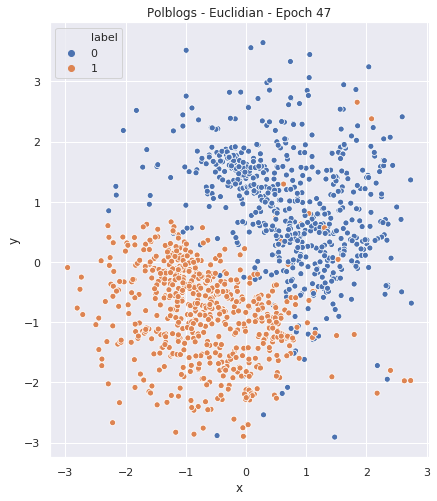

In [120]:
chkpnt = torch.load('results/polblogs/result_eu.pth', map_location='cpu')

lt = chkpnt['embeddings']
obj = chkpnt["objects"]
epk = chkpnt['epoch']
labels = [labels_dic[o] for o in obj]
lt_numpy = lt.numpy()
df = pandas.DataFrame(lt_numpy, columns=['x', 'y'])
df['label'] = labels
df['name'] = obj

fig = plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x="x", y="y", hue="label", data=df)
ax.set_aspect('equal')
ax.set_title('Polblogs - Euclidian - Epoch %s'%epk)


In [124]:
data, labels_dic = read_gml("resources/polbooks/polbooks.gml", "resources/polbooks")

In [ ]:
def exp():
    

0


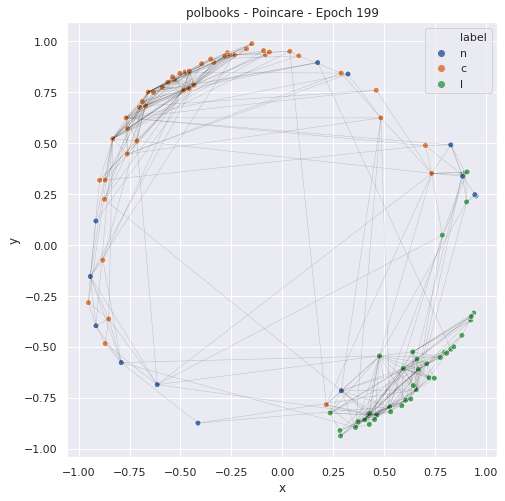

In [152]:
data, labels_dic = read_gml("resources/polbooks/polbooks.gml", 
                                "resources/polbooks")
    
    
chkpnt = torch.load('results/polbooks/result.pth', map_location='cpu')

lt = chkpnt['embeddings']
obj = chkpnt["objects"]
epk = chkpnt['epoch']
labels = [labels_dic[o] for o in obj]
lt_np = lt.numpy()
df = pandas.DataFrame(lt_np, columns=['x', 'y'])
df['label'] = labels
df['name'] = obj

fig = plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x="x", y="y", hue="label", data=df)
ax.set_aspect('equal')
ax.set_title('polbooks - Poincare - Epoch %s'%epk)

index = {obj[i]:i for i in range(len(obj))}
ct = 0
for i, edge in data.iterrows():
    n1 = edge['id1']
    c1 = lt_np[index[n1]]
    n2 = edge['id2']
    c2 = lt_np[index[n2]]
    #if np.linalg.norm(c1-c2)>0.1:
    #    ct += 1
    plt.plot([c1[0],c2[0]], [c1[1],c2[1]], 'k-', linewidth=0.5, alpha=0.2)
print(ct)


Text(0.5, 1.0, 'polbooks - Poincare - Epoch 199')

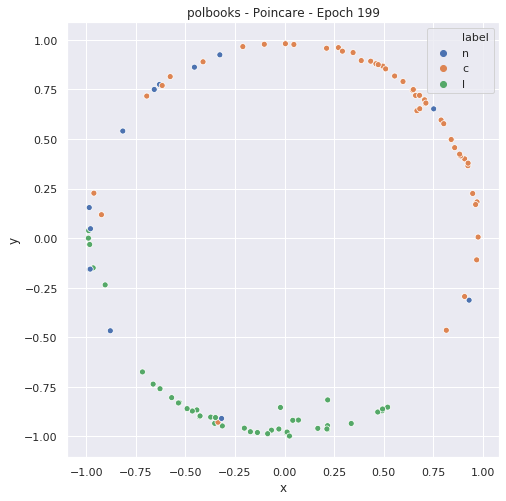

In [125]:
chkpnt = torch.load('results/polbooks/result.pth', map_location='cpu')

lt = chkpnt['embeddings']
obj = chkpnt["objects"]
epk = chkpnt['epoch']
labels = [labels_dic[o] for o in obj]
lt_numpy = lt.numpy()
df = pandas.DataFrame(lt_numpy, columns=['x', 'y'])
df['label'] = labels
df['name'] = obj

fig = plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x="x", y="y", hue="label", data=df)
ax.set_aspect('equal')
ax.set_title('polbooks - Poincare - Epoch %s'%epk)


0


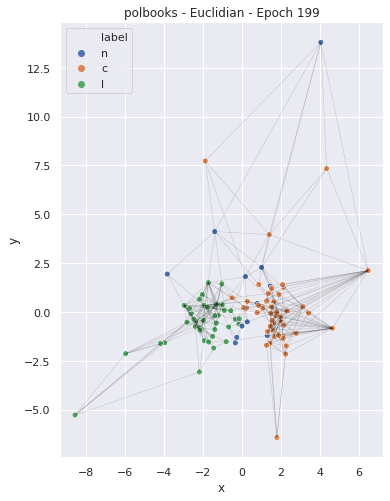

In [154]:
chkpnt = torch.load('results/polbooks/result_eu.pth', map_location='cpu')

lt = chkpnt['embeddings']
obj = chkpnt["objects"]
epk = chkpnt['epoch']
labels = [labels_dic[o] for o in obj]
lt_np= lt.numpy()
df = pandas.DataFrame(lt_np, columns=['x', 'y'])
df['label'] = labels
df['name'] = obj

fig = plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x="x", y="y", hue="label", data=df)
ax.set_aspect('equal')
ax.set_title('polbooks - Euclidian - Epoch %s'%epk)
'''
middle = df[df.apply(lambda x: x['x']**2+ x['y']**2 <0.4, axis=1)]
for i, point in middle.iterrows():
    ax.text(point['x']+.02, point['y'], str(point['name']))
'''

index = {obj[i]:i for i in range(len(obj))}
ct = 0
for i, edge in data.iterrows():
    n1 = edge['id1']
    c1 = lt_np[index[n1]]
    n2 = edge['id2']
    c2 = lt_np[index[n2]]
    #if np.linalg.norm(c1-c2)>0.1:
    #    ct += 1
    plt.plot([c1[0],c2[0]], [c1[1],c2[1]], 'k-', linewidth=0.5, alpha=0.2)
print(ct)


In [ ]:
labels = ["Case_Based", "Genetic_Algorithms", "Neural_Networks", 
    "Probabilistic_Methods", "Reinforcement_Learning",
    "Rule_Learning","Theory"]

In [199]:
def read_cora():
    links = []
    with open("resources/cora/cora.cites",'r') as f:
        line = f.readline()
        cnt = 1
        while line:
            links.append((line.strip().split("\t")))
            line = f.readline()
            cnt += 1
    print(cnt)
    df = pandas.DataFrame(links, columns=['id1', 'id2'])
    rev = df.copy().rename(columns={'id1' : 'id2', 'id2' : 'id1'})
    df = pandas.concat([df, rev])
    df['weight'] = 1
    df.to_csv(os.path.join("resources/cora", 'data.csv'), index=False)
    
    label_dic = {}

    with open("resources/cora/cora.content",'r') as f:
        line = f.readline()
        while line:
            info = line.strip().split("\t")
            label_dic[info[0]] = info[-1]
            line = f.readline()


    with open(os.path.join("resources/cora", 'labels.json'), 'w') as f:
        json.dump(label_dic, f)

    return df, label_dic

In [212]:
cora_df, cora_label = read_cora()

5430


/home/ss/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


In [ ]:
python3 embed.py \
       -dim 2 \
       -lr 0.3 \
       -epochs 200 \
       -negs 50 \
       -burnin 20 \
       -ndproc 4 \
       -manifold poincare \
       -dset resources/cora/data.csv \
       -checkpoint results/cora/result.pth \
       -batchsize 10 \
       -eval_each 1 \
       -sparse \
       -train_threads 2

python3 embed.py \
       -dim 2 \
       -lr 0.3 \
       -epochs 200 \
       -negs 50 \
       -burnin 20 \
       -ndproc 4 \
       -manifold euclidean \
       -dset resources/cora/data.csv \
       -checkpoint results/cora/result_eu.pth \
       -batchsize 10 \
       -eval_each 1 \
       -sparse \
       -train_threads 2

In [192]:
list(set(labels))

[0, 1, 2, 3, 4, 5, 6]

In [197]:
df.label.unique()

array([1, 2, 6, 4, 0, 3, 5])

In [216]:
len(obj)

2708

Text(0.5, 1.0, 'Cora - Poincare - Epoch 198')

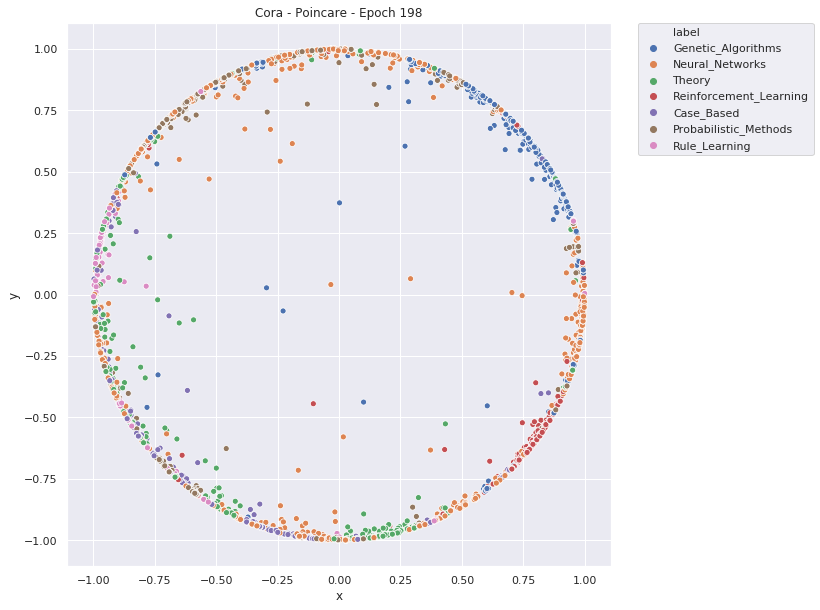

In [215]:
chkpnt = torch.load('results/cora/result.pth', map_location='cpu')

lt = chkpnt['embeddings']
obj = chkpnt["objects"]
epk = chkpnt['epoch']
labels = [cora_label[str(o)] for o in obj]
lt_numpy = lt.numpy()
df = pandas.DataFrame(lt_numpy, columns=['x', 'y'])
df['label'] = labels
df['name'] = obj

fig = plt.figure(figsize=(10, 10))
ax = sns.scatterplot(x="x", y="y", hue="label", data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_aspect('equal')
ax.set_title('Cora - Poincare - Epoch %s'%epk)


KeyError: '100monkeystyping.com'

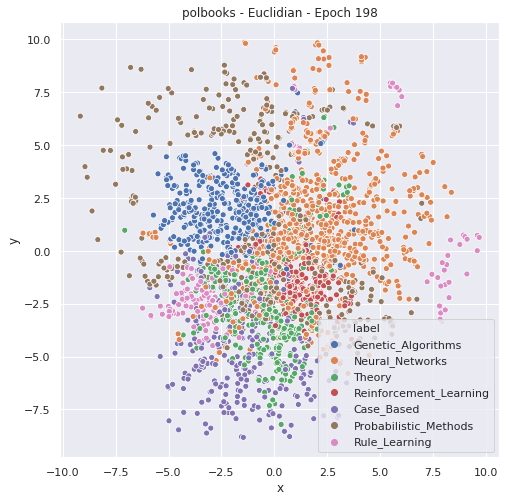

In [214]:
chkpnt = torch.load('results/cora/result_eu.pth', map_location='cpu')

lt = chkpnt['embeddings']
obj = chkpnt["objects"]
epk = chkpnt['epoch']
labels = [cora_label[str(o)] for o in obj]
lt_np= lt.numpy()
df = pandas.DataFrame(lt_np, columns=['x', 'y'])
df['label'] = labels
df['name'] = obj

fig = plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x="x", y="y", hue="label", data=df)
ax.set_aspect('equal')
ax.set_title('polbooks - Euclidian - Epoch %s'%epk)
'''
middle = df[df.apply(lambda x: x['x']**2+ x['y']**2 <0.4, axis=1)]
for i, point in middle.iterrows():
    ax.text(point['x']+.02, point['y'], str(point['name']))
'''

index = {obj[i]:i for i in range(len(obj))}
ct = 0
for i, edge in data.iterrows():
    n1 = edge['id1']
    c1 = lt_np[index[n1]]
    n2 = edge['id2']
    c2 = lt_np[index[n2]]
    #if np.linalg.norm(c1-c2)>0.1:
    #    ct += 1
    plt.plot([c1[0],c2[0]], [c1[1],c2[1]], 'k-', linewidth=0.5, alpha=0.2)
print(ct)


In [3]:
chkpnt = torch.load('results/mammals.pth', map_location='cpu')
lt = chkpnt['embeddings']

In [5]:
lt.shape

torch.Size([1180, 5])

In [7]:
lt_np = lt.numpy()

In [10]:
lt_2d = lt_np[:,:2]

In [11]:
print(lt_2d[0])

[-0.47410328  0.69495815]


In [15]:
chkpnt = torch.load('results/2d/mammals.pth', map_location='cpu')
lt = chkpnt['embeddings']

In [43]:
chkpnt.keys()

dict_keys(['conf', 'objects', 'model', 'embeddings', 'epoch', 'manifold'])

In [44]:
chkpnt["objects"]

['rhodesian_man.n.01',
 'primate.n.02',
 'stoat.n.01',
 'placental.n.01',
 'hind.n.02',
 'deer.n.01',
 'fissipedia.n.01',
 'mammal.n.01',
 'virginia_deer.n.01',
 'ruminant.n.01',
 'bottle-nosed_whale.n.01',
 'toothed_whale.n.01',
 'bushbuck.n.01',
 'western_lowland_gorilla.n.01',
 'leopard.n.02',
 'big_cat.n.01',
 'western_big-eared_bat.n.01',
 'carnivorous_bat.n.01',
 'lionet.n.01',
 'feline.n.01',
 'stag.n.02',
 'buck.n.05',
 'fawn.n.02',
 'manx.n.02',
 'domestic_cat.n.01',
 'australopithecus_boisei.n.01',
 'rat_terrier.n.01',
 'northern_flying_squirrel.n.01',
 'rodent.n.01',
 'irish_wolfhound.n.01',
 'hunting_dog.n.01',
 'eared_seal.n.01',
 'aquatic_mammal.n.01',
 'giant_eland.n.01',
 'mouse-eared_bat.n.01',
 'woodland_caribou.n.01',
 'galloway.n.02',
 'bovine.n.01',
 'mandrill.n.01',
 'eland.n.01',
 'gopher.n.04',
 'bezoar_goat.n.01',
 'welsh.n.03',
 'sporting_dog.n.01',
 'canine.n.02',
 'old_world_buffalo.n.01',
 'mountain_chinchilla.n.01',
 'wild_dog.n.01',
 'common_raccoon.n.01'